<a href="https://colab.research.google.com/github/acoiman/pdt/blob/main/asthma_mortality/notebooks/colab/03_Asthma_Mortality_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Exploratory Data Analysis (EDA) of Asthma Mortality.

The main goal of Exploratory Data Analysis (EDA) is to discover patterns, trends, and associations between variables that guide the implementation of the methodology to  model asthma mortality. For our asthma mortality EDA we will perform the follwing analysis is divided into two parts:

**Part 1 Non-geospatial data**

* Descriptive statistics
* Demographic Breakdown

**Part 2 Geospatial data**
* Outlier Detection
* Geospatial Analysis
* Temporal Analysis

## 🤖 Load libraries

The libraries required for the analysis will be loaded

In [4]:
# dataframe libraries
import pandas as pd

# geospatial libraries
import geopandas as gpd

# geostatistical libraries
import pysal
import mapclassify
from libpysal.weights import Queen
from pysal.lib import weights
import esda
from esda.moran import Moran
from esda.moran import Moran_Local



# numpy
import numpy as np

# plot libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
from splot import esda as esdaplot

# time-series libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# picture libraries
from IPython.display import Image
import imageio.v2 as imageio

# other libraries
from scipy.stats import poisson
import os
from itables import init_notebook_mode, show

In [5]:
# change directory to work folder (at the begining docker container enter into /home/jovyan/)
%cd work

/home/jovyan/work


## 📈 Part 1 Non-geospatial data

In this section we will perform EDA on sex, age group and time features of our asthma mortality dataset

In [ ]:
# Load the cleaned asthma mortality dataset from 2001 to 2022 containing categorical clases
# for sex and age group (resulting from the preprocessing)
df = pd.read_csv('pdt/asthma_mortality/data/csv/def_asma_2001_2022_clean_02.csv',  dtype={'IDDPTO': str})

### Descriptive statistics



In [ ]:
# Check data types and missing values
print(df.info())

In [ ]:
print("\nMissing values:\n", df.isnull().sum())

In [ ]:
# Summary statistics for number of deaths
print("\nDescriptive statistics for CANTIDAD columns:\n")
print(df.CANTIDAD.describe())

In [ ]:
# Number of deaths per year
# Grouping the data by year and summing the 'CANTIDAD' column
df_mpa = df.groupby('ANIO')['CANTIDAD'].sum().reset_index()

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=False)
df_mpa.head()

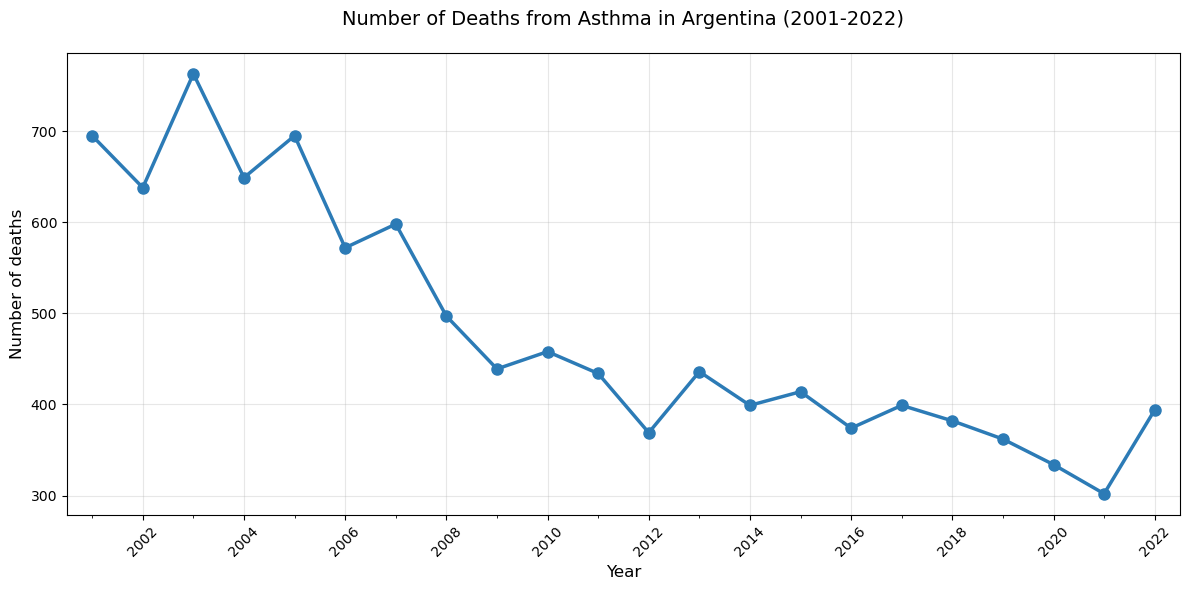

In [ ]:
# Plot number of deaths from asthma in Argentina
# Create figure
plt.figure(figsize=(12, 6))

# Create line plot
plt.plot(df_mpa['ANIO'], df_mpa['CANTIDAD'],
         marker='o',
         linestyle='-',
         color='#2c7bb6',
         linewidth=2.5,
         markersize=8)

# Formatting
plt.title('Number of Deaths from Asthma in Argentina (2001-2022)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of deaths', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(df_mpa['ANIO'][::2], rotation=45)  # Show every other year
plt.xlim(2000.5, 2022.5)  # Add buffer on x-axis

# Improve tick formatting
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.tight_layout()
plt.show();

### Demographic Breakdown

#### Asthma Deaths over Time by Sex and Age Group

In [ ]:
# Load the cleaned asthma mortality dataset from 2001 to 2022
df = pd.read_csv('pdt/asthma_mortality/data/csv/def_asma_2001_2022_clean_02.csv', dtype={'IDDPTO': str})

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=False)
df.head()

In [ ]:
# Map the 'SEXO' column values to their corresponding labels using the sex_map dictionary
sex_map = {1: 'Masculino', 2: 'Femenino'}
df['SEXO'] = df['SEXO'].map(sex_map)

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=False)
df.head()

In [ ]:
# Custom order of age groups
age_order = ['0-4', '5-19', '20-44', '45-64', '65-74', '>= 75']

In [ ]:
# Convert the 'GRUPEDAD' column to a categorical type with a specific order
df['GRUPEDAD'] = pd.Categorical(df['GRUPEDAD'], categories=age_order, ordered=True)

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=False)
df.head()

In [ ]:
# Group the DataFrame by 'GRUPEDAD', 'SEXO', and 'ANIO', summing the 'CANTIDAD' column
df_agg = df.groupby(['GRUPEDAD', 'SEXO', 'ANIO'], as_index=False, observed=True)['CANTIDAD'].sum()

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=False)
df_agg.head()

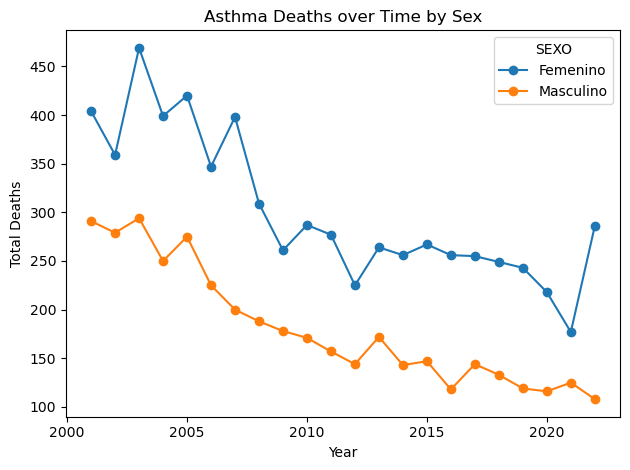

In [ ]:
# Plot age group trend over years
# Group data by year and sex, then sum the 'CANTIDAD' column; reshape the result and fill missing values with 0
sex_time = df.groupby(['ANIO', 'SEXO'])['CANTIDAD'].sum().unstack().fillna(0)
# Plot the data with markers
sex_time.plot(marker='o')
# Add a title to the plot
plt.title("Asthma Deaths over Time by Sex")
# Label the x-axis
plt.xlabel("Year")
# Label the y-axis
plt.ylabel("Total Deaths")
# Add a legend with a title
plt.legend(title='SEXO')
# Adjust layout to prevent overlapping elements
plt.tight_layout()
# Display the plot
plt.show();

In [ ]:
# Plot Asthma Deaths over Time by Age Group
# Group the data by year ('ANIO') and age group ('GRUPEDAD'), then sum the 'CANTIDAD' column
age_time = df.groupby(['ANIO', 'GRUPEDAD'])['CANTIDAD'].sum().unstack().fillna(0)
# Plot the grouped data with markers for better visualization
age_time.plot(marker='o')
# Add a title to the plot
plt.title("Asthma Deaths over Time by Age Group")
# Label the x-axis as 'Year'
plt.xlabel("Year")
# Label the y-axis as 'Total Deaths'
plt.ylabel("Total Deaths")
# Add a legend with the title 'Age Group' and position it outside the plot
plt.legend(title='Age Group', bbox_to_anchor=(1.0, 1.02))
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust the layout to prevent overlapping elements
plt.tight_layout()
# Display the plot
plt.show()

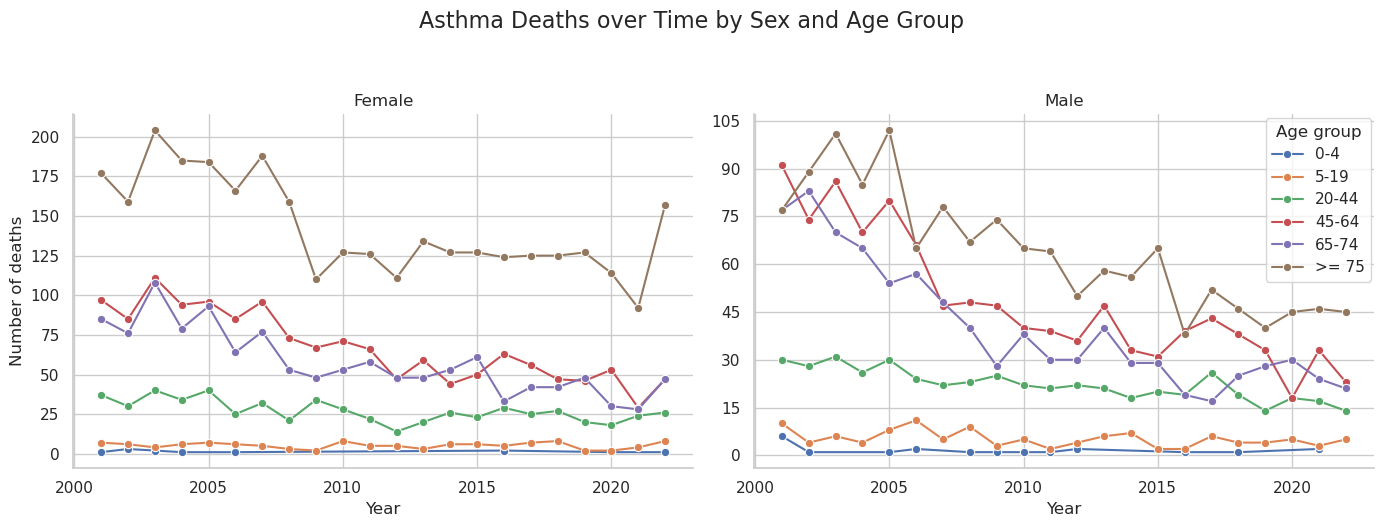

In [ ]:
# Plot Line charts  showing annual asthma deaths by sex and age group (2001–2022)
sns.set(style="whitegrid")

# Create the FacetGrid: one plot per sex
g = sns.FacetGrid(df_agg, col="SEXO", height=5, aspect=1.4, sharey=False)

# Plot lines: deaths over year, color by age_group
g.map_dataframe(sns.lineplot, x="ANIO", y="CANTIDAD", hue="GRUPEDAD", marker="o")

# Extract legend handles and labels
handles, labels = g.axes[0][0].get_legend_handles_labels()

# Define your custom order
custom_order = ['0-4', '5-19', '20-44', '45-64', '65-74', '>= 75']

# Sort handles and labels based on custom order
sorted_pairs = sorted(zip(labels, handles), key=lambda x: custom_order.index(x[0]))
sorted_labels, sorted_handles = zip(*sorted_pairs)


# Add legend
g.fig.legend(
    handles=sorted_handles,
    labels=sorted_labels,
    title="Age group",
    loc='center left',
    bbox_to_anchor=(0.91, 0.67),
    borderaxespad=0.
)

# for tiles chane Femenino to female and Masculino to Male
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    if ax.get_title() == "Masculino":
        ax.set_title("Male")
    elif ax.get_title() == "Femenino":
        ax.set_title("Female")

g.fig.suptitle("Asthma Deaths over Time by Sex and Age Group", fontsize=16, y=1.05)

# Force integer ticks on y-axis
for ax in g.axes.flat:
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# change x and y labels
g.set_xlabels("Year")
g.set_ylabels("Number of deaths")

# Ensure that subplots fit into the figure area properly
plt.tight_layout()

plt.show();

#### Asthma Deaths by Sex and Age Groups

In [ ]:
# Load the cleaned asthma mortality dataset from 2001 to 2022
df = pd.read_csv('pdt/asthma_mortality/data/csv/def_asma_2001_2022_clean_02.csv', dtype={'IDDPTO': str})

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=False)
df.head()

In [ ]:
# Map the 'SEXO' column values to their corresponding labels using the sex_map dictionary
sex_map = {1: 'Masculino', 2: 'Femenino'}
df['SEXO'] = df['SEXO'].map(sex_map)

In [ ]:
# Grouping the data by 'SEXO' (sex) and summing up the 'CANTIDAD' (quantity) column
deaths_by_sex = df.groupby('SEXO')['CANTIDAD'].sum().reset_index()

# change  Femenino to Female and Masculino to male
deaths_by_sex['SEXO'] = deaths_by_sex['SEXO'].replace({'Femenino': 'Female', 'Masculino': 'Male'})

# Grouping the data by 'GRUPEDAD' (age group) and summing up the 'CANTIDAD' (quantity) column
deaths_by_age_group = df.groupby('GRUPEDAD')['CANTIDAD'].sum().reset_index()

In [ ]:
# Sorting DataFrame by Age Group
age_order = ['0-4', '5-19', '20-44', '45-64', '65-74', '>= 75']
deaths_by_age_group['GRUPEDAD'] = pd.Categorical(deaths_by_age_group['GRUPEDAD'], categories=age_order, ordered=True)
deaths_by_age_group = deaths_by_age_group.sort_values('GRUPEDAD')

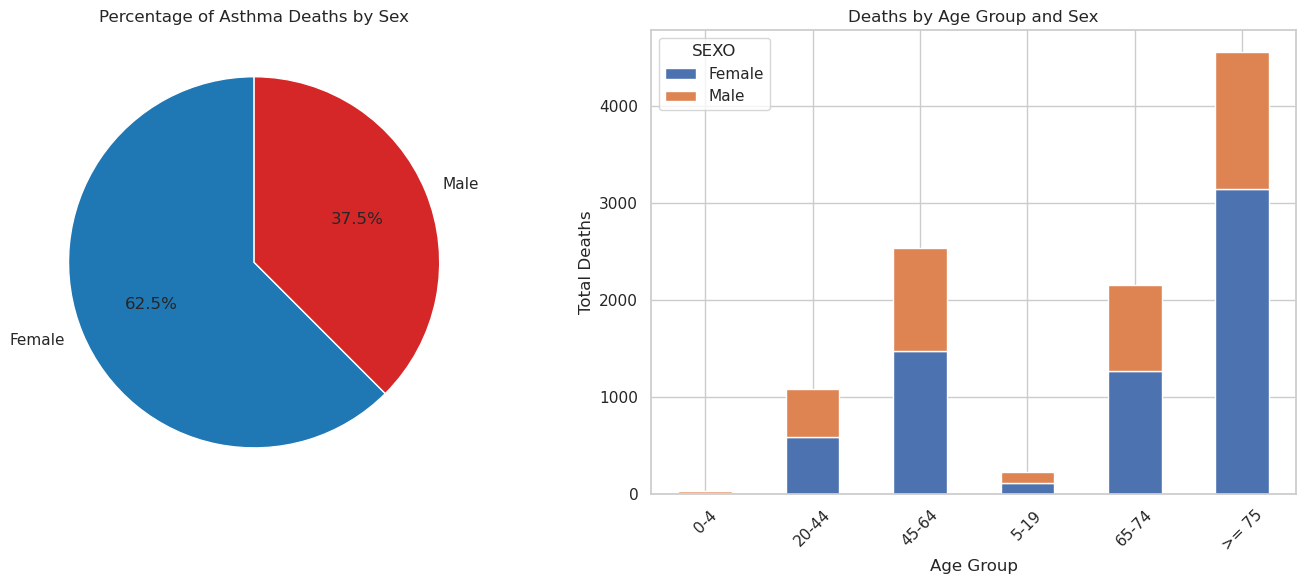

In [ ]:
# Set style
sns.set(style="whitegrid")

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot pie chart showing the percentage of deaths by sex
axes[0].pie(
    deaths_by_sex['CANTIDAD'],
    labels=deaths_by_sex['SEXO'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#d62728']
)
axes[0].set_title('Percentage of Asthma Deaths by Sex')


# Plot stacked bar chart (Sex x Age Group)
deaths_pivot = df.groupby(['SEXO', 'GRUPEDAD'])['CANTIDAD'].sum().unstack().fillna(0)
deaths_pivot.index = deaths_pivot.index.map({'Femenino': 'Female', 'Masculino': 'Male'})
deaths_pivot.T.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("Deaths by Age Group and Sex")
axes[1].set_ylabel("Total Deaths")
axes[1].set_xlabel("Age Group")
axes[1].legend(title='SEXO')
axes[1].tick_params(axis='x', rotation=45) #

# final adjustments
plt.tight_layout()
plt.show();

In [ ]:
# load data from a CSV file containing asthma mortality data from 2001 to 2022
df = pd.read_csv('pdt/asthma_mortality/data/csv/def_asma_2001_2022_clean_02.csv', dtype={'IDDPTO': str})

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=False)
df.head()

In [ ]:
# Map the 'SEXO' column values to their corresponding labels using the sex_map dictionary
sex_map = {1: 'Masculino', 2: 'Femenino'}
df['SEXO'] = df['SEXO'].map(sex_map)

In [ ]:
# group data by age group ('GRUPEDAD') and gender ('SEXO'), and calculate the total count ('CANTIDAD')
pyramid_df = df.groupby(['GRUPEDAD', 'SEXO'])['CANTIDAD'].sum().reset_index()

In [ ]:
# Sorting DataFrame (pyramid_df ) by Age Group
age_order = ['0-4', '5-19', '20-44', '45-64', '65-74', '>= 75']
pyramid_df['GRUPEDAD'] = pd.Categorical(pyramid_df['GRUPEDAD'], categories=age_order, ordered=True)
pyramid_df = pyramid_df.sort_values('GRUPEDAD')

In [ ]:
# Convert male deaths to negative to get a pyramid efect
pyramid_df['CANTIDAD'] = pyramid_df.apply(
    lambda row: -row['CANTIDAD'] if row['SEXO'] == 'Masculino' else row['CANTIDAD'], axis=1
)

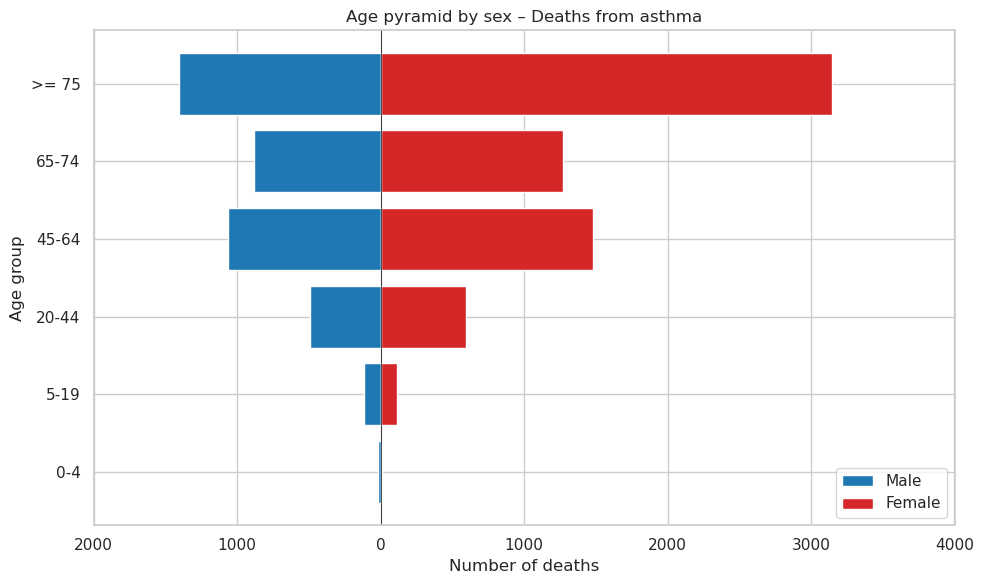

In [ ]:
# Age pyramid by sex and deaths from asthma
plt.figure(figsize=(10, 6))
for sex, color in zip(['Masculino', 'Femenino'], ['#1f77b4', '#d62728']):
    subset = pyramid_df[pyramid_df['SEXO'] == sex]
    # Change labels here before plotting
    label = "Male" if sex == "Masculino" else "Female"
    plt.barh(subset['GRUPEDAD'], subset['CANTIDAD'], color=color, label=label)

# Aesthetics of the graph
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Number of deaths')
plt.ylabel('Age group')
plt.title('Age pyramid by sex – Deaths from asthma')
plt.legend(loc='lower right')

# Make all x-tick labels positive
xticks = plt.xticks()[0]  # Get current x-tick locations
plt.xticks(xticks, [abs(int(x)) for x in xticks])  # Replace labels with absolute values

# final adjustments
plt.tight_layout()
plt.show()

#### Tables of Asthma Deaths by Sex and Age Group

In [5]:
# load data from a CSV file containing asthma mortality data from 2001 to 2022
df = pd.read_csv('pdt/asthma_mortality/data/csv/def_asma_2001_2022_clean_02.csv', dtype={'IDDPTO': str})

In [6]:
# Proportion of deaths by age group and sex
cross_age_sex = pd.crosstab(df['GRUPEDAD'], df['SEXO'], values=df['CANTIDAD'], aggfunc='sum', normalize='index')

In [7]:
# display dataframe
cross_age_sex

SEXO             1         2
GRUPEDAD                    
0-4       0.625000  0.375000
20-44     0.451613  0.548387
45-64     0.417453  0.582547
5-19      0.500000  0.500000
65-74     0.409091  0.590909
>= 75     0.309043  0.690957

In [8]:
# Total deaths by sex
deaths_by_sex = df.groupby('SEXO')['CANTIDAD'].sum()

In [9]:
# visualize table
deaths_by_sex

SEXO
1    3977
2    6626
Name: CANTIDAD, dtype: int64

In [11]:
# Pivot table of deaths by year and age group
pivot = pd.pivot_table(df, values='CANTIDAD', index='ANIO', columns='GRUPEDAD', aggfunc='sum', fill_value=0)

In [12]:
# visualize pivot table
pivot

GRUPEDAD  0-4  20-44  45-64  5-19  65-74  >= 75
ANIO                                           
2001        7     67    188    17    162    254
2002        4     58    159    10    159    248
2003        2     71    197    10    178    305
2004        1     60    164    10    144    270
2005        1     70    176    15    147    286
2006        3     49    151    17    121    231
2007        0     54    143    10    125    266
2008        1     44    121    12     93    226
2009        1     59    114     5     76    184
2010        1     50    111    13     91    192
2011        1     43    105     7     88    190
2012        2     36     83     9     78    161
2013        0     41    106     9     88    192
2014        0     44     77    13     82    183
2015        0     43     81     8     90    192
2016        3     48    102     7     52    162
2017        0     51     99    13     59    177
2018        1     46     85    12     67    171
2019        0     34     79     6     76    167
2020        1     36     71     7     60    159
2021        2     41     62     7     52    138
2022        1     40     70    13     68    202

## 🌎 Part 2 Geospatial data

In this section, we perform Exploratory Spatial Data Analysis (ESDA) on the Normalized Asthma Mortality Rate (NAMR) and time-related features of the asthma mortality dataset. The goal of this analysis is to identify and understand spatial and temporal patterns of asthma mortality at the departmental level. ESDA enables us to detect regional disparities and temporal trends, providing insights into the geographic and seasonal variation in asthma-related deaths across Argentina.

### Outlier Detection

During the data preprocessing phase, we observed unusually high values in the Normalized Asthma Mortality Rate (NAMR). For example, in 2004, the NAMR reached a maximum value of 192.31, which is substantially higher than typical values observed across the dataset. Such extreme values may distort the performance of predictive models and hinder meaningful interpretation. Therefore, in this section, we focus on the detection and treatment of outliers using statistical methods to ensure data consistency and improve model robustness.

#### Load dataset

In [6]:
# Load  `gdf`  from a shapefile containing only asthma mortality rate from 2001 to 2022
gdf = gpd.read_file("pdt/asthma_mortality/data/shp/tma_2001_2022.shp", encoding='utf-8')

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=True)
gdf.head()

#### Statistical summary and distribution analysis

In [7]:
# Filter asthma mortality rate columns
mortality_cols = [col for col in gdf.columns if col.startswith('CA_')]
mortality_df = gdf[mortality_cols].copy()

In [8]:
# Summary statistics and initial distribution plots
mortality_df.describe().T

count      mean       std  min  25%  50%    75%     max
CA_2001  511.0  2.240372  9.206320  0.0  0.0  0.0  2.450  192.31
CA_2002  511.0  1.715382  3.674803  0.0  0.0  0.0  2.235   39.11
CA_2003  511.0  2.115832  5.064828  0.0  0.0  0.0  2.695   71.12
CA_2004  511.0  1.505421  2.864154  0.0  0.0  0.0  2.030   21.02
CA_2005  511.0  1.600254  3.720018  0.0  0.0  0.0  2.130   57.50
CA_2006  511.0  1.425832  3.141526  0.0  0.0  0.0  1.755   29.46
CA_2007  511.0  1.432505  2.853373  0.0  0.0  0.0  1.905   21.57
CA_2008  511.0  1.053033  2.494379  0.0  0.0  0.0  1.465   37.86
CA_2009  511.0  1.327965  3.951665  0.0  0.0  0.0  1.270   56.27
CA_2010  511.0  1.043170  2.066042  0.0  0.0  0.0  1.185   13.03
CA_2011  511.0  1.038689  2.201949  0.0  0.0  0.0  1.150   13.63
CA_2012  511.0  0.829041  1.881393  0.0  0.0  0.0  0.890   12.77
CA_2013  511.0  1.009609  2.943092  0.0  0.0  0.0  0.940   47.33
CA_2014  511.0  0.948317  2.495825  0.0  0.0  0.0  0.865   23.63
CA_2015  511.0  0.938845  2.719463  0.0  0.0  0.0  0.865   29.07
CA_2016  511.0  0.658650  1.449484  0.0  0.0  0.0  0.790   11.13
CA_2017  511.0  0.874912  2.087397  0.0  0.0  0.0  0.875   23.21
CA_2018  511.0  0.931996  2.203441  0.0  0.0  0.0  0.925   19.99
CA_2019  511.0  0.925127  2.720594  0.0  0.0  0.0  0.665   35.86
CA_2020  511.0  0.680489  1.927018  0.0  0.0  0.0  0.365   16.30
CA_2021  511.0  0.728395  1.895045  0.0  0.0  0.0  0.485   17.39
CA_2022  511.0  0.953699  2.120590  0.0  0.0  0.0  0.895   14.15

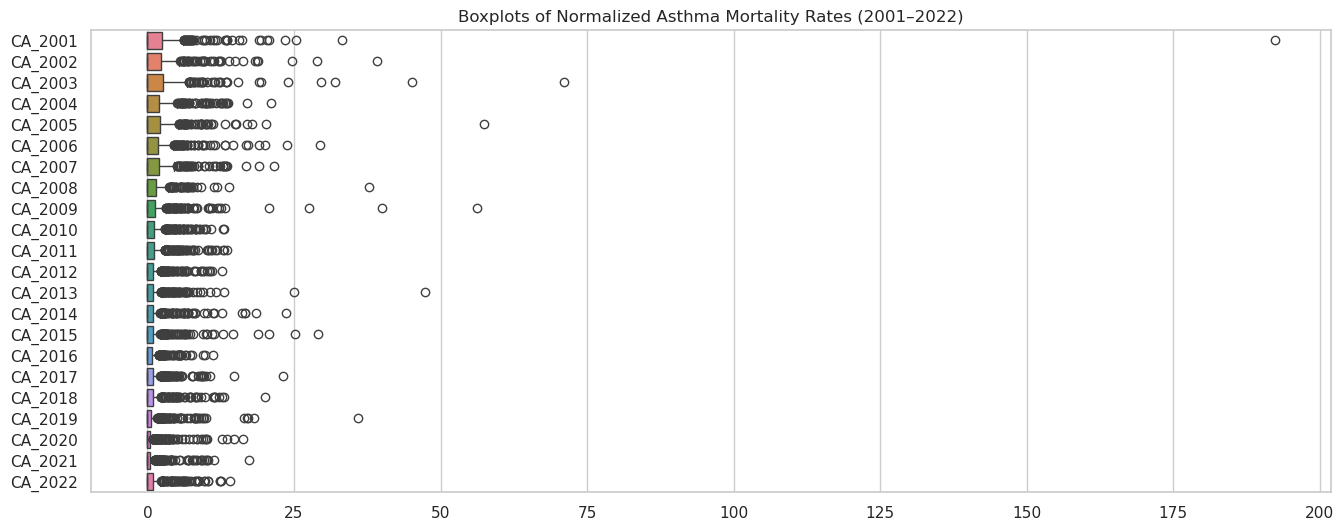

In [ ]:
# Plot boxplots for each year
plt.figure(figsize=(16, 6))
sns.boxplot(data=mortality_df, orient='h')
plt.title("Boxplots of Normalized Asthma Mortality Rates (2001–2022)")
plt.show()

We observed that the asthma mortality rate in the Lihuel Calel department is unusually high (192 deaths per 100,000 inhabitants). To investigate potential environmental causes, we conducted an online search for relevant events in the area. However, no significant or widely documented environmental incidents were recorded in Lihuel Calel during 2001. According to the national census, the department's population in 2001 was only 520 inhabitants—a 12.16% decrease from the 1991 census, which reported 592 inhabitants. Therefore, the elevated mortality rate is primarily due to the very small population size in the department, which amplifies the impact of even a few recorded deaths

In [ ]:
# filter data of Lihuel Calel department
init_notebook_mode(all_interactive=True)
filtered_gdf = gdf[gdf['CA_2001'] == 192.31]
filtered_gdf

#### Outlier detection  and removal

This effect is denominated small counts problem in epidemiology, and refers to the statistical challenges that arise when analyzing rare events or diseases in small populations, leading to unstable or unreliable estimates of rates, risks, or associations<sup>1</sup>.


The limitations of small population sizes and low death numbers significantly impact the accuracy of asthma mortality rate estimates by introducing variability and potential biases in the data. Small populations may not capture the full spectrum of mortality events, leading to unreliable age-specific mortality rates. Additionally, low death counts can result in statistical fluctuations, making it difficult to discern true trends and patterns in asthma-related mortality, ultimately compromising the validity of the estimates derived from such data<sup>2,3</sup>.

To deal with outliers coming from low-populated and  with low mortality rate departments, we figured out the following solution based on<sup>4</sup> :

* Flag as statistically unstable those departments with population < 5,000, deaths < 5, and relative CI (Confidence Interval) width > 2.0.

* The normalized mortality rate for those departments will be 0.

To flag departments according to these condition,s we will execute the following function:

In [ ]:
def flag_and_correct_unstable_rates_efficient(gdf, start_year=2001, end_year=2022):
    all_ci_dfs = []  # List to collect CI and flag DataFrames for each year

    # Loop through each year in the specified range
    for year in range(start_year, end_year + 1):
        pop_col    = f"A_{year}"    # Population column for the year
        deaths_col = f"C_{year}"    # Deaths count column for the year
        rate_col   = f"CA_{year}"   # Mortality rate column for the year

        # Skip processing if any of the required columns are missing
        if not {pop_col, deaths_col, rate_col}.issubset(gdf.columns):
            continue  # Move to next year if columns are not found

        # Extract the relevant series for calculations
        pop    = gdf[pop_col]       # Population data
        deaths = gdf[deaths_col]    # Death counts
        rate   = gdf[rate_col]      # Mortality rate

        # Compute the 95% Poisson confidence interval for deaths
        ci_low   = poisson.ppf(0.025, deaths) / pop * 100000   # Lower bound per 100k
        ci_high  = poisson.ppf(0.975, deaths) / pop * 100000   # Upper bound per 100k
        ci_width = ci_high - ci_low                            # Absolute CI width
        rel_w    = ci_width / rate.replace(0, pd.NA)           # Relative CI width (avoid divide-by-zero)

        # Flag as unstable when all conditions are met:
        # 1) population < 5000
        # 2) deaths < 5
        # 3) relative CI width > 2.0
        unstable = (pop < 5000) & (deaths < 5) & (rel_w > 2.0)

        # Overwrite the original rate with zero for unstable entries
        gdf.loc[unstable, rate_col] = 0

        # Create a temporary DataFrame with CI and flag columns
        ci_df = pd.DataFrame({
            f"ci_low_{year}"      : ci_low,
            f"ci_high_{year}"     : ci_high,
            f"ci_width_{year}"    : ci_width,
            f"rel_ci_width_{year}": rel_w,
            f"unstable_{year}"    : unstable
        }, index=gdf.index)

        # Append this year's CI DataFrame to the list
        all_ci_dfs.append(ci_df)

        # Log the result
        num_unstable = ci_df[f'unstable_{year}'].sum()
        print(f"Year {year}: {num_unstable} unstable departments flagged.")

    # After looping, concatenate all CI/flag DataFrames alongside the original GeoDataFrame
    if all_ci_dfs:
        gdf = pd.concat([gdf] + all_ci_dfs, axis=1)

    return gdf  # Return the updated GeoDataFrame with CI and flag columns added


In [ ]:
# apply the function
gdf2 = flag_and_correct_unstable_rates_efficient(gdf)

The number of departaments flagged as statistically unstable per year is as follows:

* Year 2001: 4 unstable departments flagged.
* Year 2002: 0 unstable departments flagged.
* Year 2003: 5 unstable departments flagged.
* Year 2004: 0 unstable departments flagged.
* Year 2005: 1 unstable departments flagged.
* Year 2006: 3 unstable departments flagged.
* Year 2007: 1 unstable departments flagged.
* Year 2008: 1 unstable departments flagged.
* Year 2009: 3 unstable departments flagged.
* Year 2010: 0 unstable departments flagged.
* Year 2011: 0 unstable departments flagged.
* Year 2012: 0 unstable departments flagged.
* Year 2013: 2 unstable departments flagged.
* Year 2014: 1 unstable departments flagged.
* Year 2015: 2 unstable departments flagged.
* Year 2016: 0 unstable departments flagged.
* Year 2017: 1 unstable departments flagged.
* Year 2018: 0 unstable departments flagged.
* Year 2019: 1 unstable departments flagged.
* Year 2020: 0 unstable departments flagged.
* Year 2021: 0 unstable departments flagged.
* Year 2022: 0 unstable departments flagged.




In [ ]:
# visualize rows where the number of departements flagged as unstable was larger (2003)
init_notebook_mode(all_interactive=True)
gdf2[gdf2['unstable_2003'] == True]

In [ ]:
# select the same columns as the original gdf
gdf2 = gdf2[list(gdf.columns)]

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=True)
gdf2.head()

#### Visual Confirmation

In [ ]:
# Filter asthma mortality rate columns
mortality_cols = [col for col in gdf2.columns if col.startswith('CA_')]
mortality_df = gdf2[mortality_cols].copy()

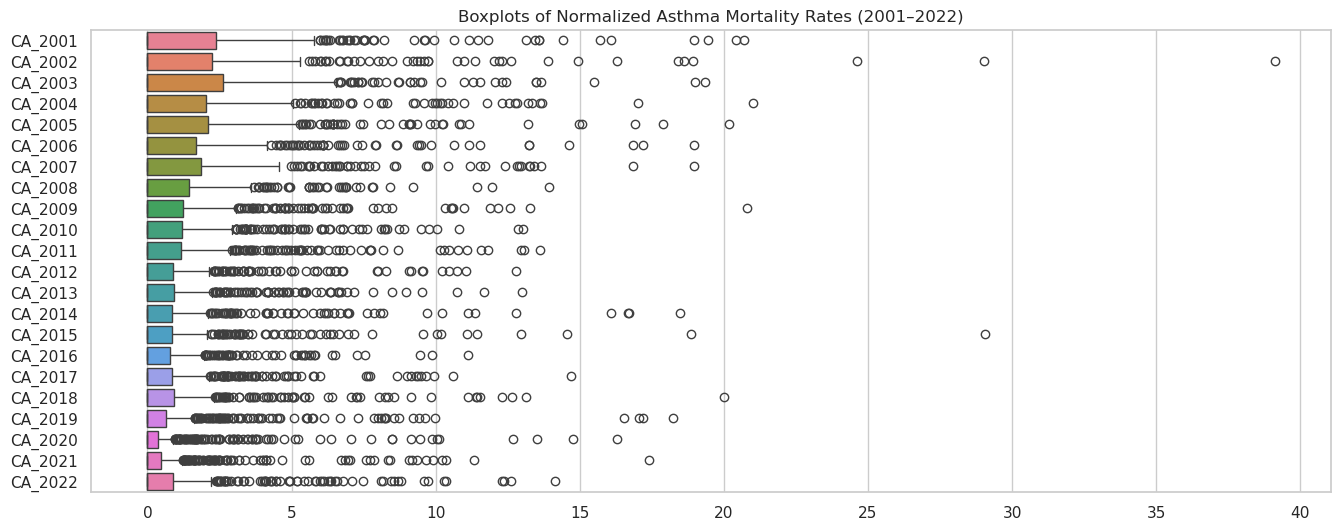

In [ ]:
# Plot boxplots for each year
plt.figure(figsize=(16, 6))
sns.boxplot(data=mortality_df, orient='h')
plt.title("Boxplots of Normalized Asthma Mortality Rates (2001–2022)")
plt.show()

In [ ]:
# export gdf as a shapefile
# this shapefile was subject to outlier removal
gdf2.to_file("pdt/asthma_mortality/data/shp/tma_2001_2022_2.shp", encoding='utf-8')

In [ ]:
# export gdf as a gpkg file
# this shapefile was subject to outlier removal
gdf2.to_file("pdt/asthma_mortality/data/gpkg/tma_2001_2022_2.gpkg", driver='GPKG', encoding='utf-8')

### Geospatial Analysis

In this section, we map and assess the spatial distribution and clustering of key metrics, such as the Normalized Asthma Mortality Rate (NAMR). We create choropleth maps to visualize spatial patterns, apply spatial autocorrelation measures (e.g., Global Moran’s I and Local Indicators of Spatial Association – LISA) to detect statistically significant clusters, and identify spatial outliers to determine where extreme values are concentrated.



#### Map NAMR by department (choropleth map)

We will create choropleth maps in as faceted mapas with the asthma mortality rate per 100,000 inhabitants for each department and by year of study (2001-2022).

In [ ]:
# Load  `gdf`  from a shapefile containing asthma mortality data from 2001 to 2022.
gdf = gpd.read_file("pdt/asthma_mortality/data/shp/tma_2001_2022_2.shp", encoding='utf-8')

In [ ]:
# Display the first few rows of the DataFrame
init_notebook_mode(all_interactive=True)
gdf.head()

In [ ]:
# Determine the number of rows in the GeoDataFrame.
len(gdf)

511

We will use [Pysal](https://pysal.org/)'s [mapclassify](https://pysal.org/mapclassify/index.html) library to determine the best classifier for the choropleth map.

Weq will use the map classifier with the best ACDM (mean Absolute Deviation Around the class Median). In Pysal, ACDM refers to the mean absolute deviation around the class median. It is a measure of a classifier's fit to the data, specifically by evaluating the average distance between each data point and the median value of the assigned class.

In [ ]:
# Select columns corresponding to normalized mortality rate  from 2001 to 2022
selected_data_2001_2022 = gdf.loc[:,["CA_2001", "CA_2002", "CA_2003", "CA_2004", "CA_2005", "CA_2006", "CA_2007", "CA_2008", "CA_2009", "CA_2010",
                                     "CA_2011", "CA_2012", "CA_2013", "CA_2014", "CA_2015", "CA_2016", "CA_2017", "CA_2018", "CA_2019", "CA_2020",
                                     "CA_2021", "CA_2022"]]

In [ ]:
# Classify the data into 5 quantile groups
q5 = mapclassify.Quantiles(selected_data_2001_2022, k=5)
q5

In [ ]:
# Equal Interval Classification
ei5 = mapclassify.EqualInterval(selected_data_2001_2022, k=5)
ei5

EqualInterval

   Interval      Count
----------------------
[ 0.00,  7.82] | 10927
( 7.82, 15.64] |   276
(15.64, 23.47] |    35
(23.47, 31.29] |     3
(31.29, 39.11] |     1

In [ ]:
# Classify the data into groups based on the head/tail breaks algorithm
ht = mapclassify.HeadTailBreaks(selected_data_2001_2022)
ht

HeadTailBreaks

   Interval      Count
----------------------
[ 0.00,  1.09] |  8250
( 1.09,  3.89] |  2022
( 3.89,  7.44] |   626
( 7.44, 11.22] |   219
(11.22, 14.88] |    82
(14.88, 18.98] |    30
(18.98, 23.29] |     9
(23.29, 30.45] |     3
(30.45, 39.11] |     1

In [ ]:
# MaximumBreaks classification method
mb5 = mapclassify.MaximumBreaks(selected_data_2001_2022, k=5)
mb5

MaximumBreaks

   Interval      Count
----------------------
[ 0.00, 19.71] | 11232
(19.71, 22.82] |     6
(22.82, 26.82] |     1
(26.82, 34.09] |     2
(34.09, 39.11] |     1

In [ ]:
# Apply the Standard Deviation and Mean classification method to the selected data.
msd = mapclassify.StdMean(selected_data_2001_2022)
msd

StdMean

   Interval      Count
----------------------
( -inf, -3.71] |     0
(-3.71, -1.31] |     0
(-1.31,  3.49] | 10131
( 3.49,  5.89] |   564
( 5.89, 39.11] |   547

In [ ]:
# Apply Fisher-Jenks classification with 5 classes
fj5 = mapclassify.FisherJenks(selected_data_2001_2022, k=5)
fj5

FisherJenks

   Interval      Count
----------------------
[ 0.00,  1.15] |  8340
( 1.15,  3.84] |  1916
( 3.84,  7.92] |   681
( 7.92, 14.41] |   258
(14.41, 39.11] |    47

ACDM(mean Absolute Deviation Around the class Median) visualization

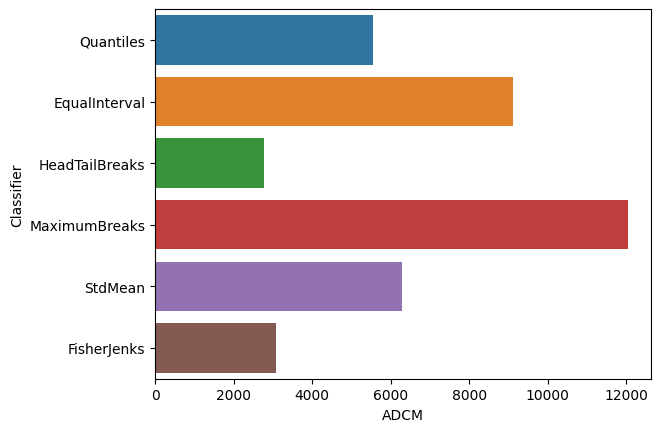

In [ ]:
# Bunch classifier objects
class5 = q5, ei5, ht, mb5, msd, fj5
# Collect ADCM for each classifier
fits = np.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = sns.barplot(
    y="Classifier", x="ADCM", data=adcms, hue= adcms["Classifier"],  legend=False
)

Two classifiers have the lowest ACDM: FisherJenks and HeadTailBreaks. We'll select FisherJenks as the classifier to create the choropleth maps.

In [ ]:
# Convert the bins to a list for further processing
bins = fj5.bins.tolist()
bins

[1.15, 3.84, 7.92, 14.41, 39.11]

In [ ]:
# insert 0 at 0 position
bins.insert(0, 0.0)
bins

[0.0, 1.15, 3.84, 7.92, 14.41, 39.11]

In [ ]:
# round and transform to integer
# bins = [int(round(num, 0)) for num in bins]
# fix last value
# bins[-1]=193
# bins

We will create a function to set a custom classification scheme based on FisherJenks

In [ ]:
def maptma(colname, title, row, col):
    # Create a custom classification using UserDefined
    classification = mapclassify.UserDefined(gdf[colname], bins)

    classification.plot(
          gdf,  # GeoDataFrame containing the data to be plotted
          legend=True,  # Enable the legend for the plot
          legend_kwds={
                "fmt": "{:.0f}",  # Format the legend labels as integers
                # "loc": "upper right",  # Position the legend in the upper right corner
                "bbox_to_anchor": (1.2, 0.4),  # Adjust the legend's position
                "fontsize": 8,  # Set the font size of the legend
                "labels": ["0.0", "0.0-1.15", "1.15-3.84", "3.84-7.92", "7.92-14.41", "14.41-39.11"],  # Use the custom legend labels
          },
          axis_on=False,  # Disable the axis display
          border_color='black',  # Set the border color of the plot
          cmap="viridis_r",  # Use the reversed Viridis colormap
          ax=axes[row, col]  # Specify the subplot to draw the plot on
     )

    # Set the title for the current axis
    axes[row, col].set_title(title)

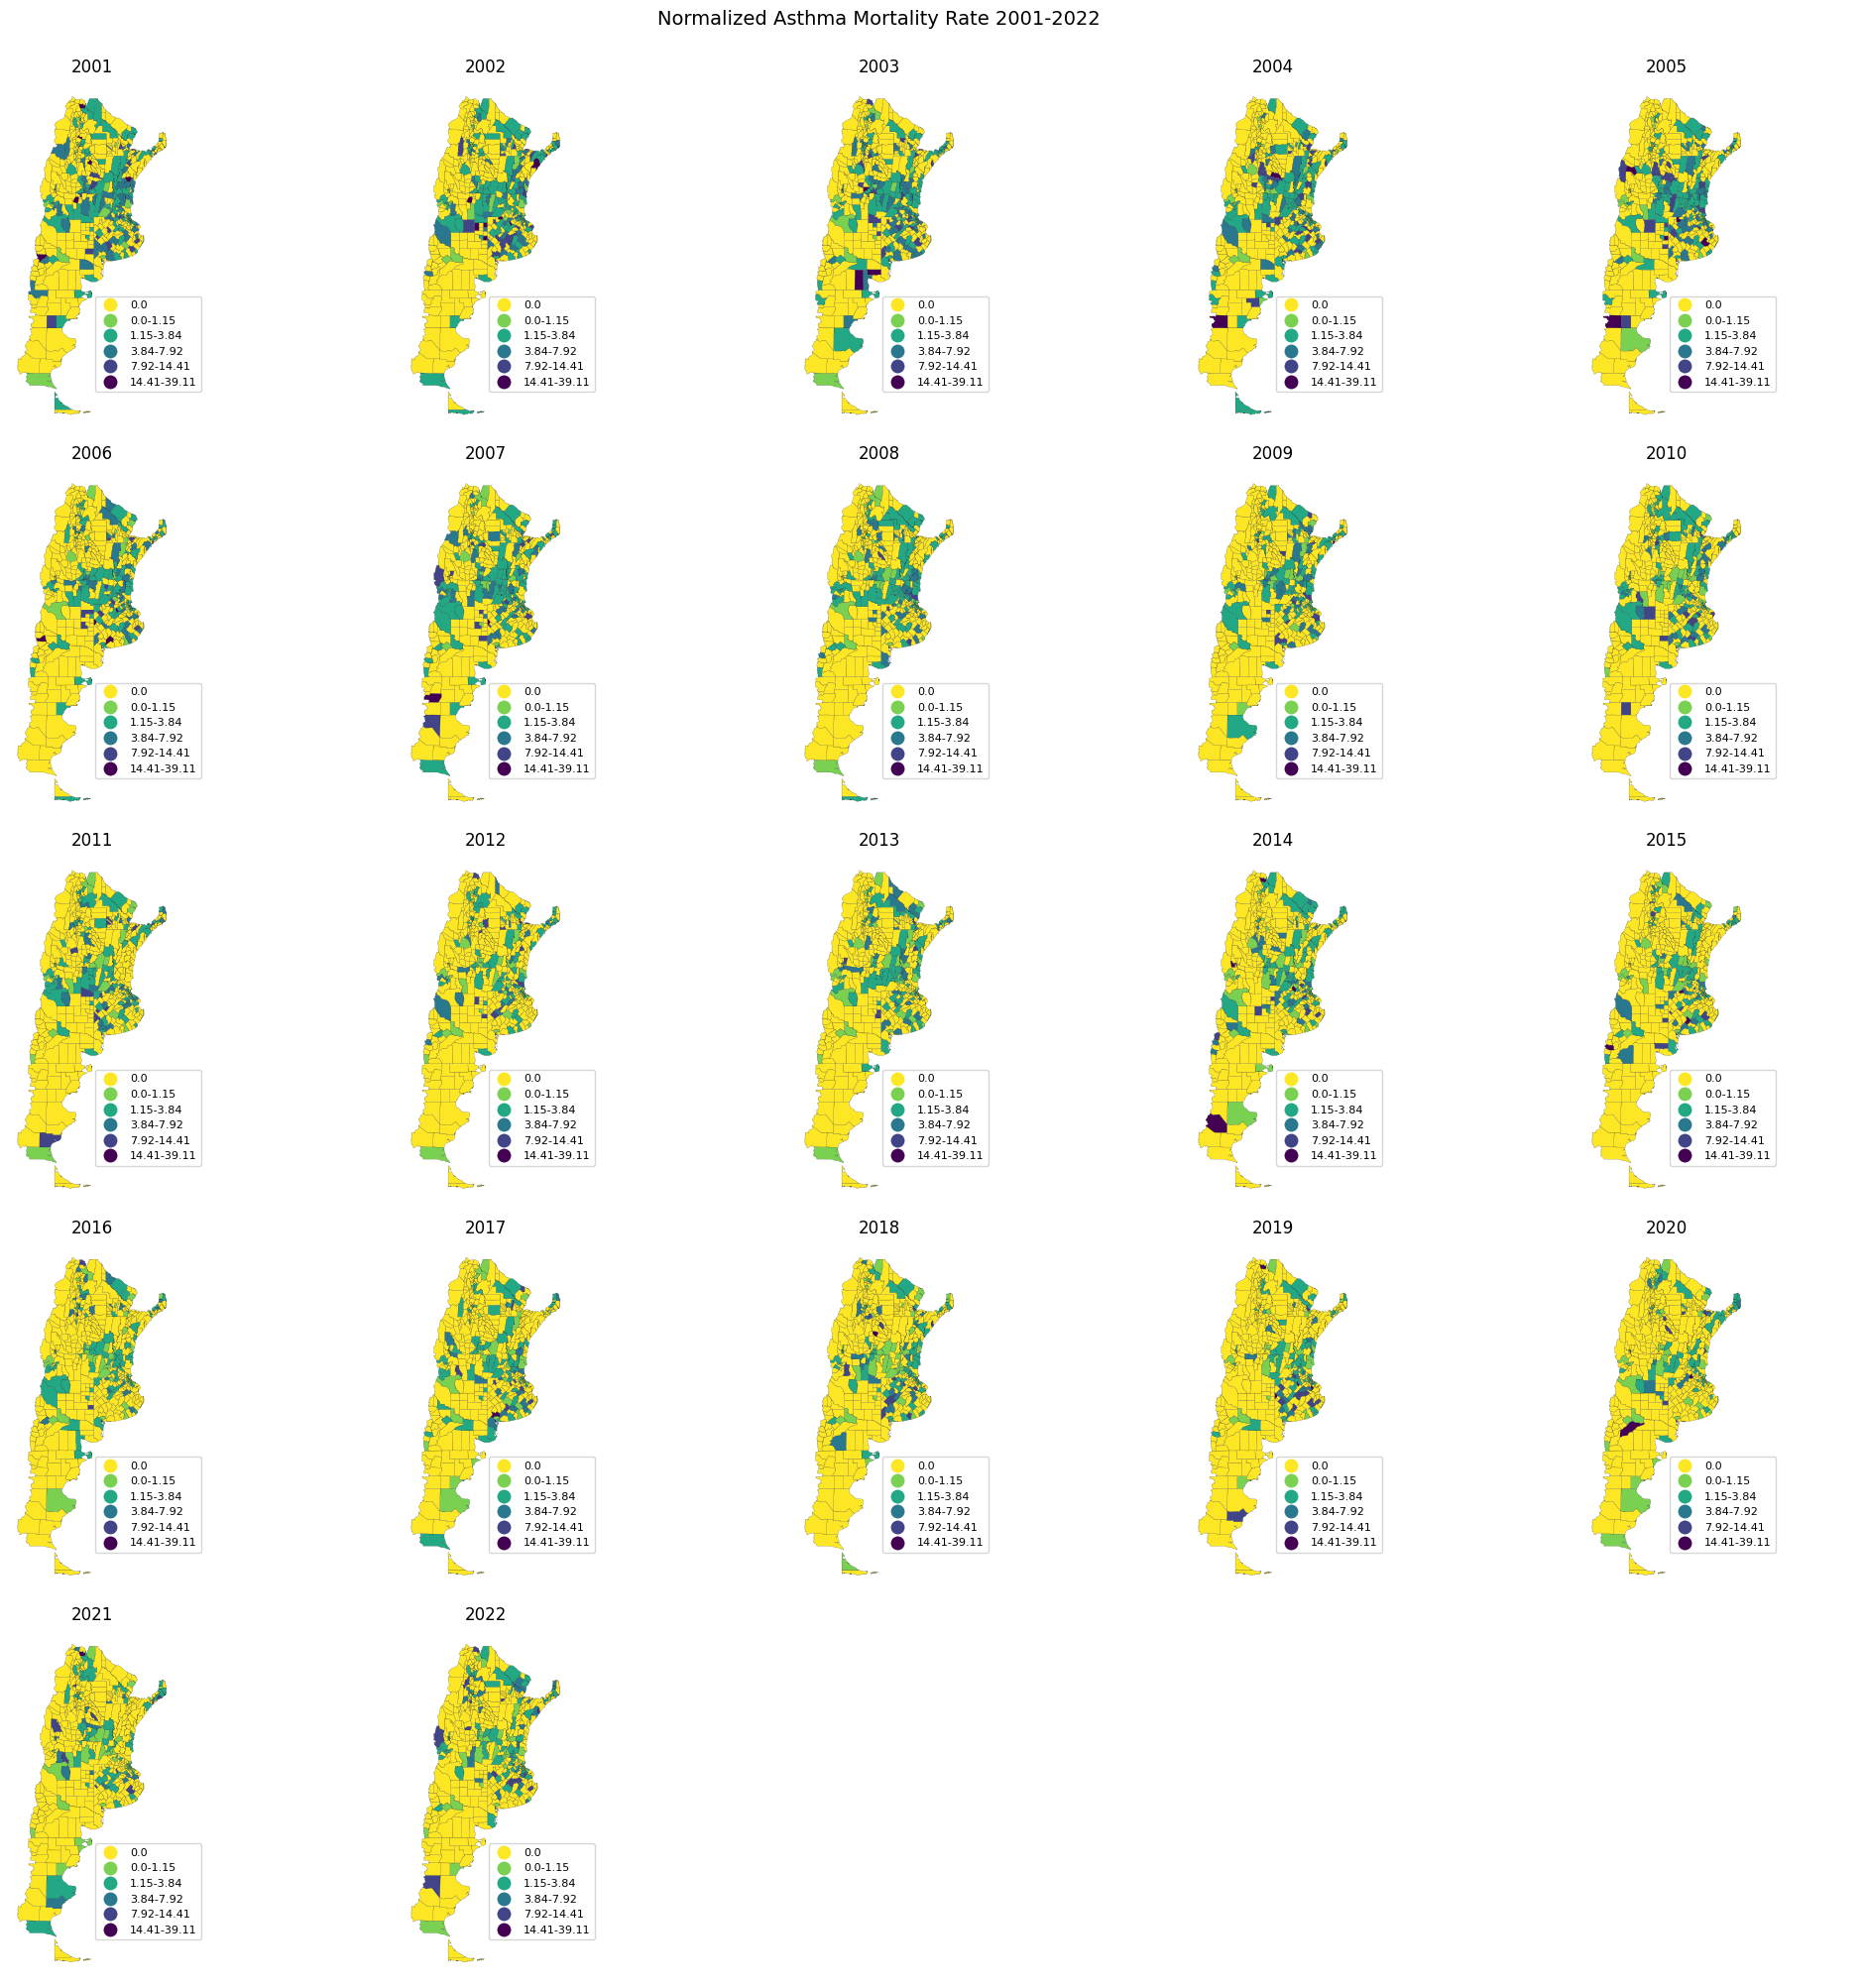

In [ ]:
# Create a 5x5 grid of subplots with a figure size of 20x20
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
# Add a title to the entire figure with specific font size and position
plt.suptitle('Normalized Asthma Mortality Rate 2001-2022', fontsize=14, y=1)

# row 0
maptma("CA_2001", "2001", 0, 0)  # Map data for 2001 in row 0, column 0
maptma("CA_2002", "2002", 0, 1)  # Map data for 2002 in row 0, column 1
maptma("CA_2003", "2003", 0, 2)  # Map data for 2003 in row 0, column 2
maptma("CA_2004", "2004", 0, 3)  # Map data for 2004 in row 0, column 3
maptma("CA_2005", "2005", 0, 4)  # Map data for 2005 in row 0, column 4

# row 1
maptma("CA_2006", "2006", 1, 0)  # Map data for 2006 in row 1, column 0
maptma("CA_2007", "2007", 1, 1)  # Map data for 2007 in row 1, column 1
maptma("CA_2008", "2008", 1, 2)  # Map data for 2008 in row 1, column 2
maptma("CA_2009", "2009", 1, 3)  # Map data for 2009 in row 1, column 3
maptma("CA_2010", "2010", 1, 4)  # Map data for 2010 in row 1, column 4

# row 2
maptma("CA_2011", "2011", 2, 0)  # Map data for 2011 in row 2, column 0
maptma("CA_2012", "2012", 2, 1)  # Map data for 2012 in row 2, column 1
maptma("CA_2013", "2013", 2, 2)  # Map data for 2013 in row 2, column 2
maptma("CA_2014", "2014", 2, 3)  # Map data for 2014 in row 2, column 3
maptma("CA_2015", "2015", 2, 4)  # Map data for 2015 in row 2, column 4

# row 3
maptma("CA_2016", "2016", 3, 0)  # Map data for 2016 in row 3, column 0
maptma("CA_2017", "2017", 3, 1)  # Map data for 2017 in row 3, column 1
maptma("CA_2018", "2018", 3, 2)  # Map data for 2018 in row 3, column 2
maptma("CA_2019", "2019", 3, 3)  # Map data for 2019 in row 3, column 3
maptma("CA_2020", "2020", 3, 4)  # Map data for 2020 in row 3, column 4

# row 4
maptma("CA_2021", "2021", 4, 0)  # Map data for 2021 in row 4, column 0
maptma("CA_2022", "2022", 4, 1)  # Map data for 2022 in row 4, column 1

axes[4,2].axis('off')  # Turn off axis for row 4, column 2
axes[4,3].axis('off')  # Turn off axis for row 4, column 3
axes[4,4].axis('off')  # Turn off axis for row 4, column 4

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show();  # Display the plot

Creating an animated GIF showing the mortality rate by year

In [ ]:
# This function generates a map for a specific year and saves it as an image for use in a GIF.
def plot_map_for_gif(colname, year, bins, gdf, output_folder="pdt/asthma_mortality/data/images/gif"):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(4, 4))

    # Classify the data using user-defined bins
    classification = mapclassify.UserDefined(gdf[colname], bins)

    # Plot the classified data with custom legend and styling
    classification.plot(
        gdf,
        legend=True,
        legend_kwds={
            "fmt": "{:.0f}",  # Format legend labels as integers
            "loc": "upper right",  # Place legend in the upper right
            "bbox_to_anchor": (1.2, 0.4),  # Adjust legend position
            "fontsize": 6,  # Set legend font size
            "labels": ["0.0", "0.0-1.15", "1.15-3.84", "3.84-7.92", "7.92-14.41", "14.41-39.11"]  # Custom labels for bins
        },
        axis_on=False,  # Turn off axis
        border_color='black',  # Set border color
        cmap="viridis_r",  # Use reversed Viridis colormap
        ax=ax  # Plot on the created axis
    )

    # Set the title for the map
    ax.set_title(f"Normalized Asthma Mortality Rate - {year}", fontsize=12)
    # Turn off axis display
    ax.axis('off')

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define the file path for saving the image
    filepath = os.path.join(output_folder, f"asthma_{year}.png")
    # Save the plot as a PNG file
    plt.savefig(filepath, bbox_inches="tight", dpi=150)
    # Close the plot to free up memory
    plt.close()

In [ ]:
bins = [0.0, 1.15, 3.84, 7.92, 14.41, 39.11] # Define the bin ranges for categorizing data
years = list(range(2001, 2023))  # Create a list of years from 2001 to 2022

for year in years:  # Iterate through each year in the list
    colname = f"CA_{year}"  # Generate a column name based on the year
    plot_map_for_gif(colname, year, bins, gdf)  # Call the function to plot the map for the given year and bins


In [ ]:
def create_gif_from_maps(image_folder="pdt/asthma_mortality/data/images/gif", gif_name="pdt/asthma_mortality/data/images/gif/asthma_mortality.gif"):
    # Initialize an empty list to store images
    images = []
    # Loop through the years 2001 to 2022
    for year in range(2001, 2023):
        # Construct the filename for each year's image
        filename = f"asthma_{year}.png"
        # Create the full file path by joining the folder and filename
        filepath = os.path.join(image_folder, filename)
        # Read the image and append it to the images list
        images.append(imageio.imread(filepath))

    # Save the images as an animated GIF with 1 frame per second
    imageio.mimsave(gif_name, images, fps=1)


In [ ]:
# apply create_gif_from_maps function
create_gif_from_maps()

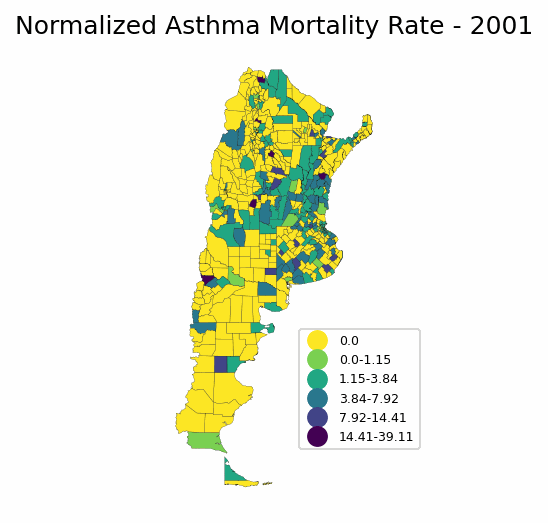

In [ ]:
# Displaying an image of asthma mortality
Image(filename="pdt/asthma_mortality/data/images/gif/asthma_mortality.gif")

#### Binary visualization of  NAMR

In [ ]:
# Load  `gdf`  from a shapefile containing asthma mortality data from 2001 to 2022
gdf = gpd.read_file("pdt/asthma_mortality/data/shp/tma_2001_2022_2.shp", encoding='utf-8')

In [ ]:
# Filter rows where all columns matching the regex pattern have a value of 0
# samples where motality rate was 0 for the whole period (2001-2022)
gdf_CA_0 = gdf[gdf.filter(regex='CA_20(0[1-9]|1[0-9]|2[0-2])$').eq(0).all(axis=1)]

In [ ]:
len(gdf_CA_0)

72

72 departments have NAMR equal to 0 in all years from 2001 to 2022

In [ ]:
# from gdf select rows that are not  in gdf_CA_0
# samples where motality rate was not 0 for the whole period (2001-2022)
gdf_CA_1 = gdf[~gdf.index.isin(gdf_CA_0.index)]

In [ ]:
len(gdf_CA_1)

439

439 departments have NAMR greather than 0 in any year from 2001 to 2022

In [ ]:
# create a copy of gdf called gdf_bin, for each CA_ column-CA_2001, CA_2002,... CA_2022-
# create a column named CA_BIN_ followed by year, for example, for 2001, it should be CA_BIN_2001.
# Set in the columns, binary values: if CA > 0, set 1; otherwise, set 0. For examample if CA_2001 == 1.2, then CA_BIN_2001 == 1

gdf_bin = gdf.copy()
for year in range(2001, 2023):
  ca_col = f'CA_{year}'
  ca_bin_col = f'CA_BIN_{year}'
  gdf_bin[ca_bin_col] = (gdf_bin[ca_col] > 0).astype(int)


In [ ]:
init_notebook_mode(all_interactive=True)
show(gdf_bin.head())

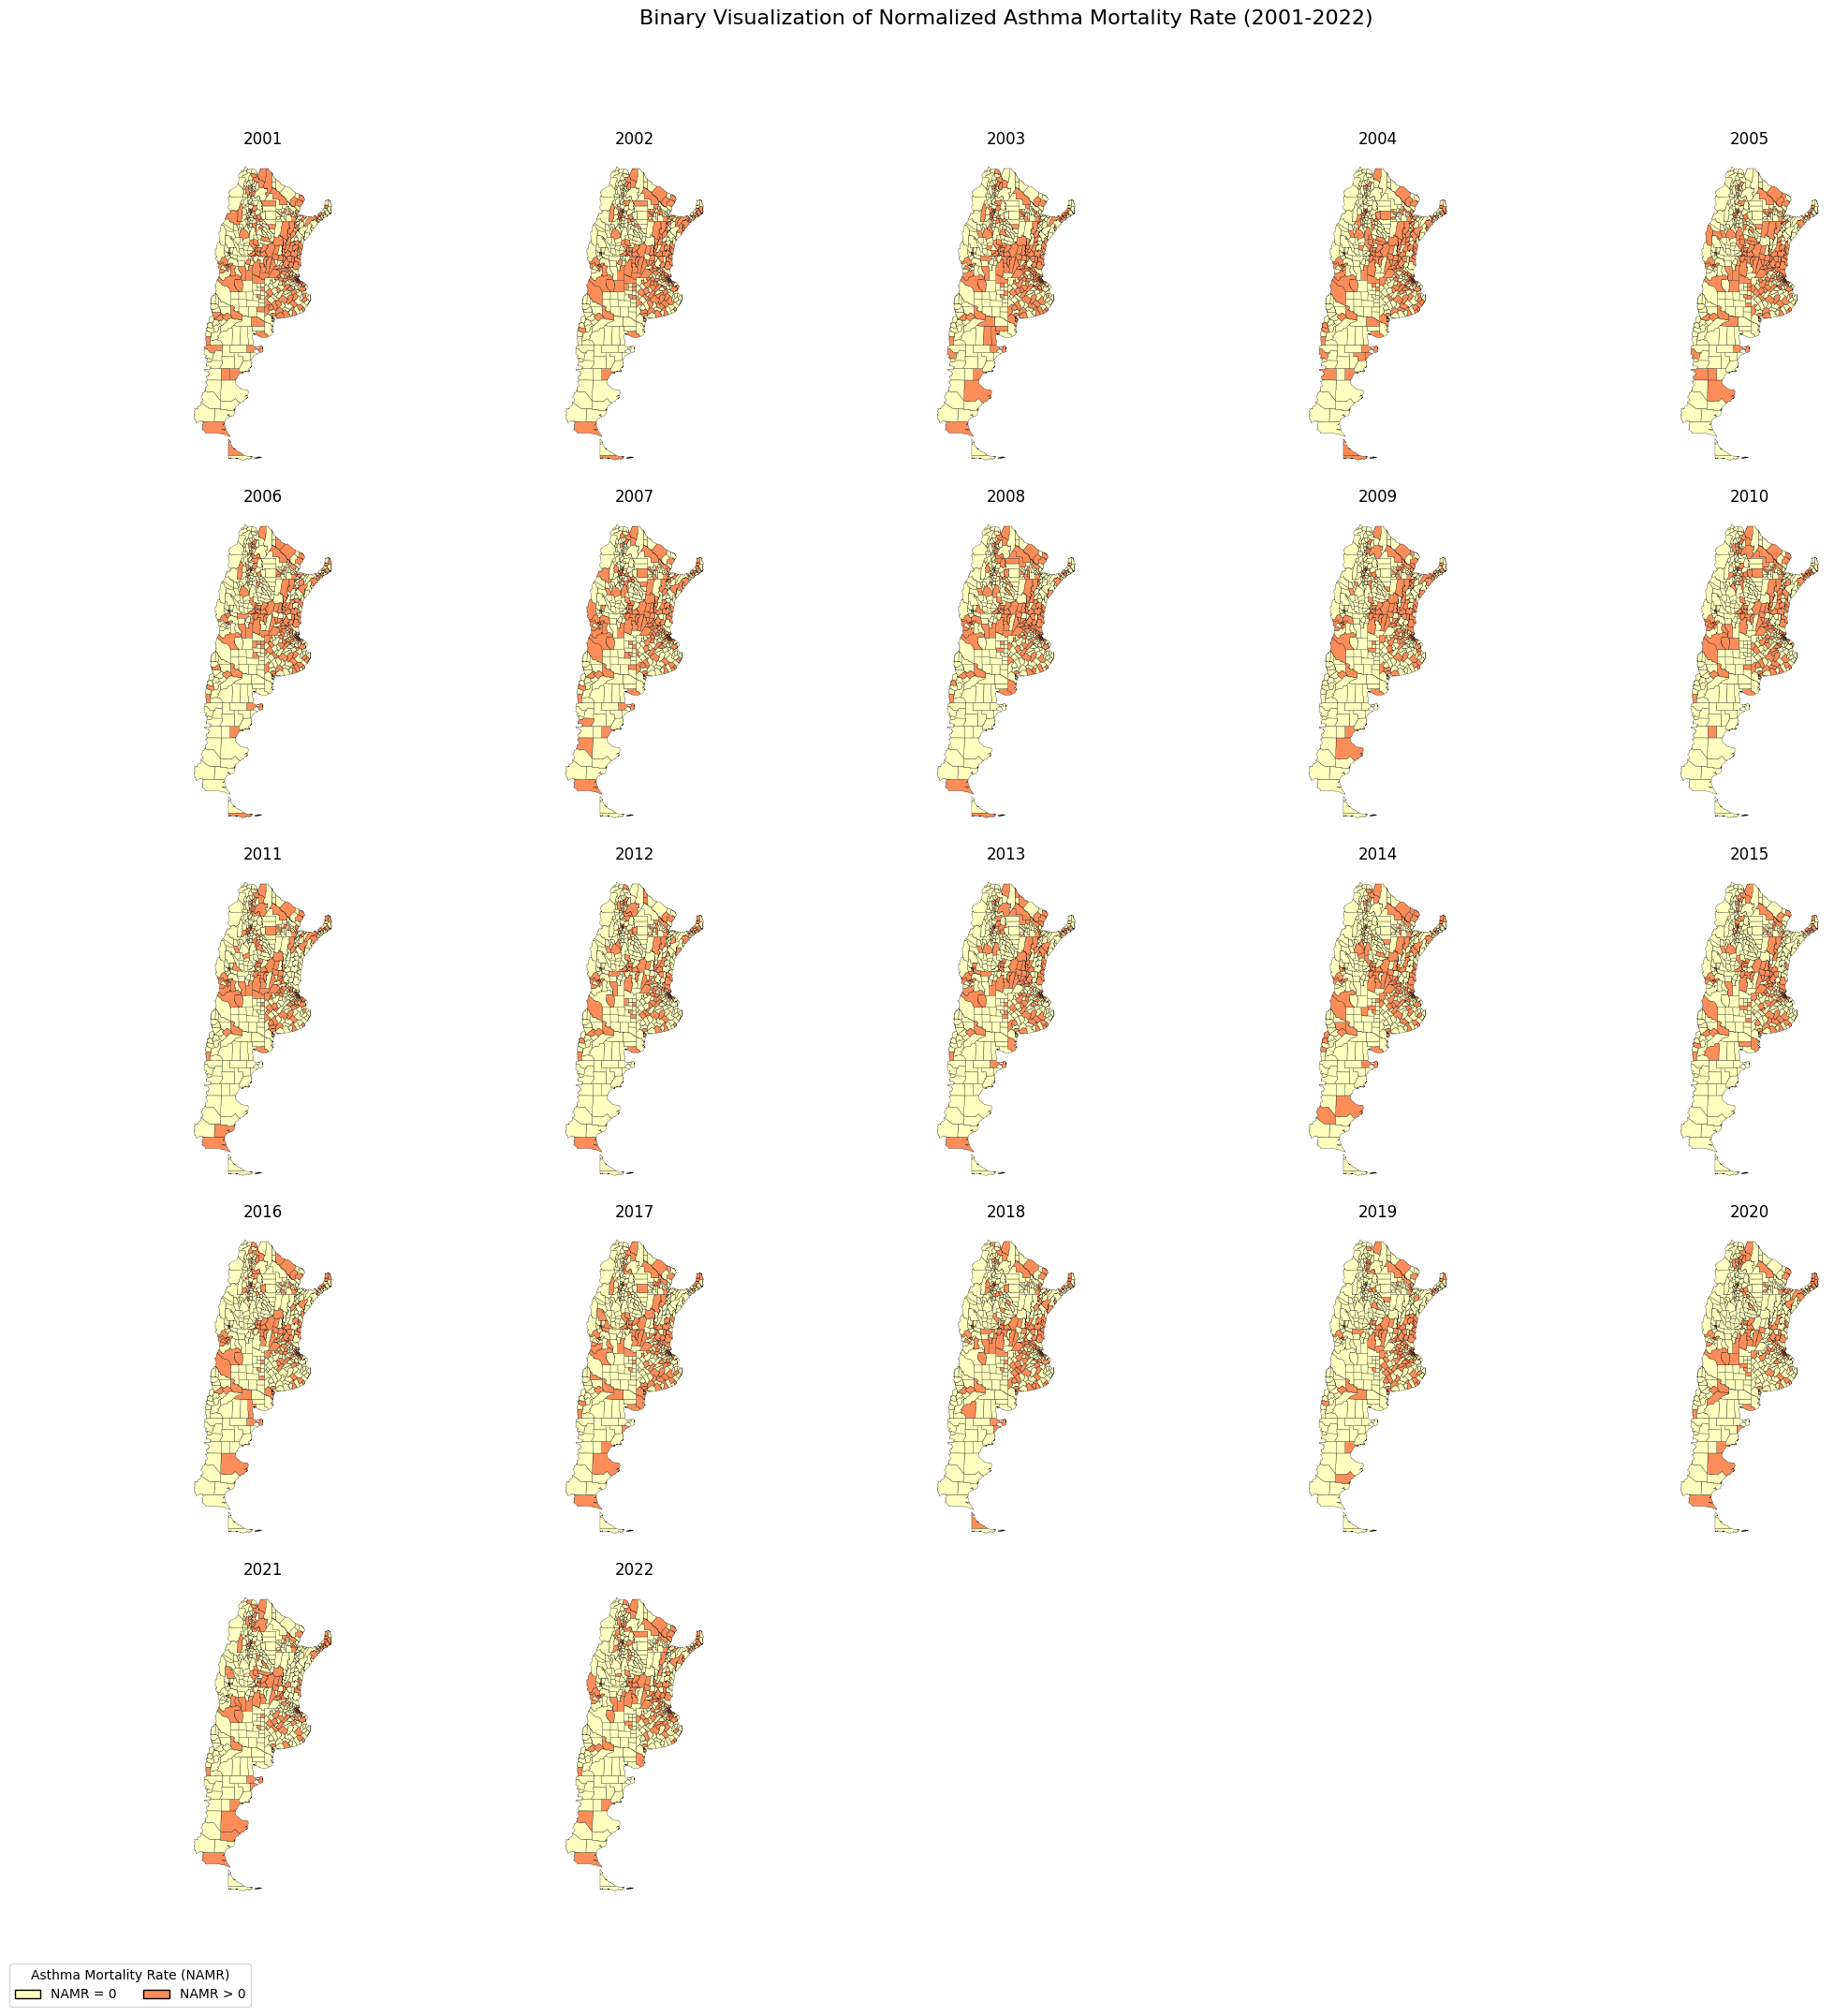

In [ ]:
# create faceted map for CA_BIN_ like columns,

# Get the list of binary columns
bin_cols = [col for col in gdf_bin.columns if col.startswith('CA_BIN_')]

# Determine grid size
n_cols = 5
n_rows = (len(bin_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Custom colormap for binary data (0 or 1)
cmap = mcolors.ListedColormap(['#ffffbf', '#fc8d59'])
bounds = [-0.5, 0.5, 1.5] # Boundaries for the colormap
norm = mcolors.BoundaryNorm(bounds, cmap.N)

for i, col in enumerate(bin_cols):
    ax = axes[i]
    year = col.split('_')[-1]
    gdf_bin.plot(
        column=col,
        ax=ax,
        cmap=cmap,
        norm=norm,
        legend=False,  # Disable legend on individual subplots
        edgecolor='black',
        linewidth=0.2
    )
    ax.set_title(f'{year}')
    ax.set_axis_off()

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend to the figure
# Create a legend handle for each class (0 and 1)
legend_elements = [
    patches.Patch(facecolor='#ffffbf', edgecolor='black', label='NAMR = 0'), # Use patches.Patch
    patches.Patch(facecolor='#fc8d59', edgecolor='black', label='NAMR > 0') # Use patches.Patch
]

fig.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.1, -0.05), ncol=2, title="Asthma Mortality Rate (NAMR)")


plt.suptitle('Binary Visualization of Normalized Asthma Mortality Rate (2001-2022)', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make space for suptitle
plt.show()

#### Spatial Autocorrelation

In [10]:
# Load  `gdf`  from a shapefile containing asthma mortality data from 2001 to 2022
gdf = gpd.read_file("pdt/asthma_mortality/data/shp/tma_2001_2022_2.shp", encoding='utf-8')

##### Evaluate spatial weights methods

In [11]:
# project gdf to 3395
gdf_pj = gdf.to_crs(3395)

In [ ]:
# Queen contiguity
gdf_queen = weights.contiguity.Queen.from_dataframe(gdf_pj, use_index=True)

In [13]:
# K-NN with four nearest neighbors
gdf_knn4 = weights.KNN.from_dataframe(gdf_pj, k=5)

In [ ]:
# Block weights
gdf_bw = weights.util.block_weights(gdf_pj.IDPROV.values)

In [15]:
# combination of block and Queen matrices
gdf_union = weights.set_operations.w_union(gdf_bw, gdf_queen)

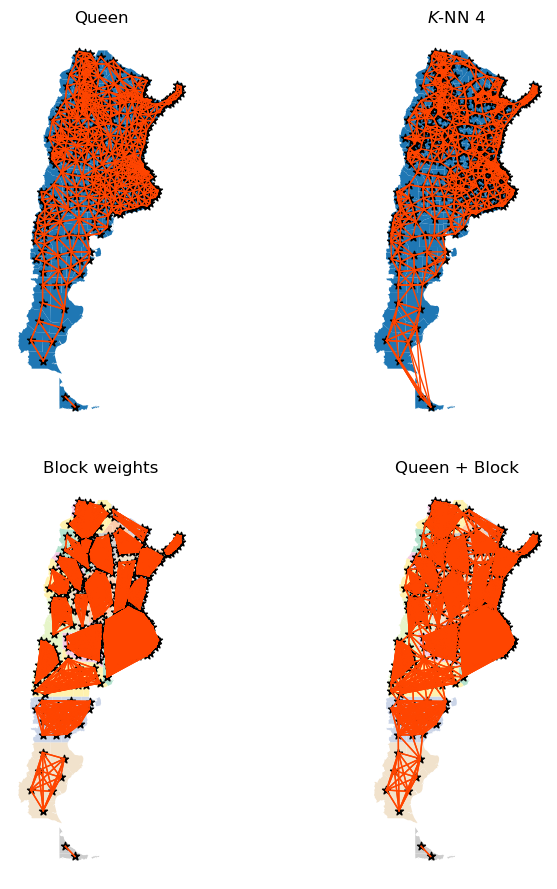

In [16]:
# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))

# Contiguity
ax = axs[0, 0]
gdf_pj.plot(ax=ax)
gdf_queen.plot(
    gdf_pj,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Queen")

# KNN
ax = axs[0, 1]
gdf_pj.plot(ax=ax)
gdf_knn4.plot(
    gdf_pj,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("$K$-NN 4")

# Block
ax = axs[1, 0]
gdf_pj.plot(column="IDPROV", categorical=True, cmap="Pastel2", ax=ax)
gdf_bw.plot(
    gdf_pj,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Block weights")

# Union
ax = axs[1, 1]
gdf_pj.plot(column="IDPROV", categorical=True, cmap="Pastel2", ax=ax)
gdf_union.plot(
    gdf_pj,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Queen + Block")
f.tight_layout()
plt.show()

In [17]:
# visualize percentage of non-zero weights (connections)
pct_nonzero_data = {
    'Weight Type': ['Queen', 'KNN (k=4)', 'Distance Band', 'Union'],
    'pct_nonzero': [
        gdf_queen.pct_nonzero,
        gdf_knn4.pct_nonzero,
        gdf_bw.pct_nonzero,
        gdf_union.pct_nonzero
    ]
}

df_weights = pd.DataFrame(pct_nonzero_data)

In [19]:
# Display the DataFrame
df_weights

Weight Type  pct_nonzero
0          Queen     1.076895
1      KNN (k=4)     0.978474
2  Distance Band     9.469939
3          Union     9.680570

Based on the results, we selected the Queen contiguity spatial weights matrix, as its percentage of non-zero elements (pct_nonzero) falls between 0.5% and 2%.  In our case, only 1.08% of all possible spatial relationships between units are non-zero.This indicates a sparse network structure that emphasizes local spatial influence. Given our objective to detect departmental clustering and neighborhood effects in asthma mortality patterns, the use of sparse matrices—such as Queen contiguity or K-nearest neighbors (KNN)—is appropriate for capturing localized spatial dependencies without over-smoothing the spatial relationships. We also observe  a Bell-shaped distribution for the number of neighbors (cardinality) that each spatial unit (e.g., department) has under the Queen contiguity matrix, indicating a well-connected, balanced geography.

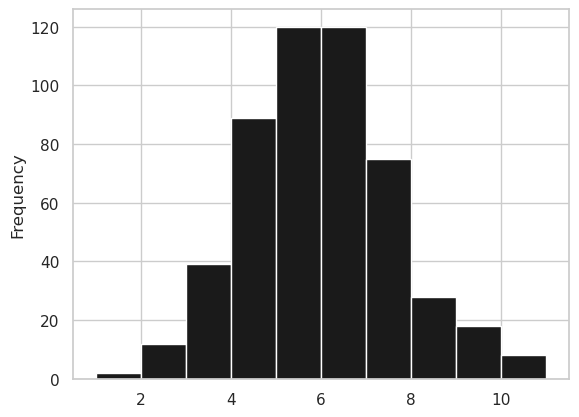

In [ ]:
pd.Series(gdf_queen.cardinalities).plot.hist(color="k");

##### Global Spatial Autocorrelation

###### Global Spatial Autocorrelation Individual Years

In [ ]:
# Create spatial weights
w = Queen.from_dataframe(gdf, use_index=True)
w.transform = 'r'  # Row-standardize weights

In [23]:
# create empty dictionaries to store Moran's I values
moran_i_results = {}
moran_p_sim_results = {}

In [24]:
# Calculate Global Moran's I for each year and store in dictionaries
for year in range(2001, 2023):
    ca_col = f'CA_{year}'
    moran_col_i = f'moran_global.I_{year}'
    moran_col_p = f'moran_global.p_sim_{year}'

    # Calculate Global Moran's I
    moran = esda.moran.Moran(gdf[ca_col], w)

    # Store results in dictionaries
    moran_i_results[moran_col_i] = moran.I
    moran_p_sim_results[moran_col_p] = moran.p_sim

In [25]:
# Create a dataframe  from moran_i_results dictionary
df_sac = pd.DataFrame({
    'year': [year for year in range(2001, 2023)],
    'moran_global.I': [moran_i_results[f'moran_global.I_{year}'] for year in range(2001, 2023)]
})

In [26]:
# add moran_p_sim_results dictionary to df_sac
df_sac['moran_global.p_sim'] = [moran_p_sim_results[f'moran_global.p_sim_{year}'] for year in range(2001, 2023)]

In [27]:
# visualize dataframe
df_sac

year  moran_global.I  moran_global.p_sim
0   2001        0.008899               0.319
1   2002        0.081803               0.005
2   2003        0.062580               0.015
3   2004        0.018701               0.209
4   2005        0.071907               0.008
5   2006        0.027469               0.122
6   2007        0.016320               0.260
7   2008        0.043083               0.053
8   2009        0.062834               0.014
9   2010        0.098859               0.001
10  2011        0.064743               0.013
11  2012       -0.010551               0.415
12  2013        0.072998               0.008
13  2014        0.002907               0.395
14  2015        0.038153               0.077
15  2016       -0.018197               0.264
16  2017        0.042501               0.052
17  2018        0.086135               0.006
18  2019        0.111947               0.003
19  2020        0.032310               0.099
20  2021        0.038444               0.072
21  2022        0.050834               0.033

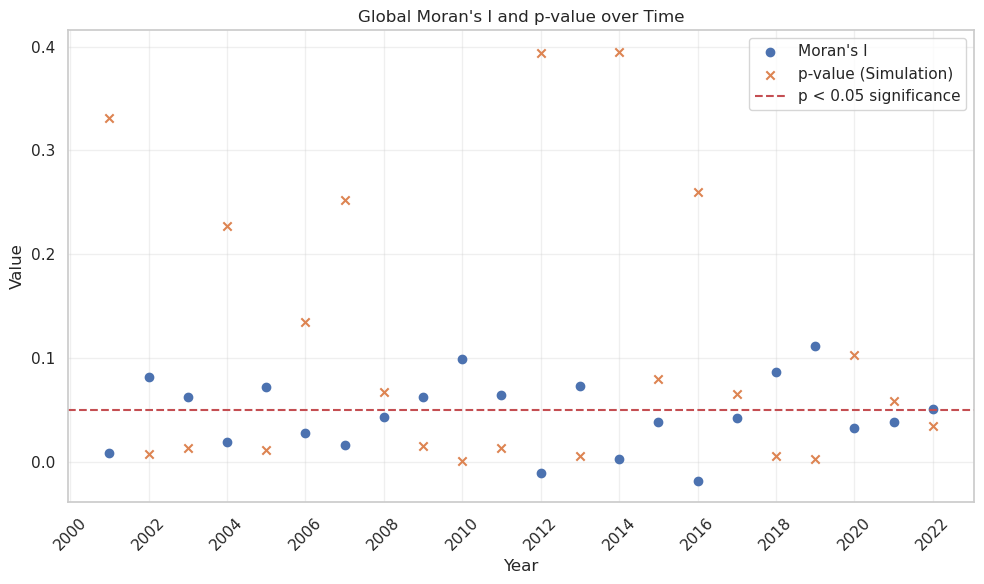

In [ ]:
# create point chart depicting moran_global.I and moran_global.p_sim, year on x axis set a dashed horizontal line setting p < 0.05

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sac['year'], df_sac['moran_global.I'], label='Moran\'s I', marker='o')
plt.scatter(df_sac['year'], df_sac['moran_global.p_sim'], label='p-value (Simulation)', marker='x')

# Add a dashed horizontal line at y=0.05 for p-value
plt.axhline(y=0.05, color='r', linestyle='--', label='p < 0.05 significance')

# Add title and labels
plt.title("Global Moran's I and p-value over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.xticks(df_sac['year'][::2], rotation=45) # Show every other year

# Add legend
plt.legend()

# Improve tick formatting
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In 10 out of the 22 years analyzed (2001, 2004, 2006, 2007, 2012, 2014, 2016, 2017, 2020, and 2021), there was insufficient evidence to reject the null hypothesis of complete spatial randomness (CSR) in the distribution of NAMR. This suggests that, during these years, asthma mortality may not exhibit significant spatial clustering. Consequently, to better understand the spatial patterns of asthma mortality, we proceed to test for spatial autocorrelation and clustering using the mean NAMR values across the entire study period.

###### Global Spatial Autocorrelation Mean NAMR

In [ ]:
# Calcualte the mean for CA from 2001–2022
gdf['CA_MEAN'] = gdf[[f"CA_{y}" for y in range(2001, 2022)]].mean(axis=1)

In [ ]:
# visualize the gdf
init_notebook_mode(all_interactive=True)
gdf.head()

In [ ]:
# Create spatial weights
w = Queen.from_dataframe(gdf, use_index=True)
w.transform = 'r'  # Row-standardize weights

In [ ]:
# Compute Moran's I for mean NAMR
moran = esda.moran.Moran(gdf['CA_MEAN'], w)

In [ ]:
# print results of Moran's I test
print (f'Moran_I: {round(moran.I, 2)}, Moran_p_sim: {moran.p_sim}')

Moran_I: 0.33, Moran_p_sim: 0.001


* Moran’s I values are moderate-good positive spatial autocorrelation.

* p-value = 0.001 → The result is statistically significant (reject the null hypothesis of spatial randomness).

* Conclusion: Neighboring departments tend to have similar mean mortality rates. This justifies grouping in clusters

Why does the Spatial Autocorrelation of individual years show low max values (0.1), and 10 out of 22 years have the Spatial Autocorrelation that is not statistically significant, while the mean mortality rate across the years shows Moran_I: 0.33, Moran_p_sim: 0.001?

The low and often non-significant spatial autocorrelation in individual years is likely due to high year-to-year variability in mortality patterns, influenced by fluctuating environmental, demographic, or policy factors that weaken spatial clustering. In contrast, the mean mortality rate over multiple years smooths out these short-term fluctuations, revealing persistent spatial patterns and chronic inequalities, which results in a stronger and statistically significant Moran’s I. Additionally, yearly data may be sparse or unevenly distributed, reducing the statistical power of Moran's I tests in some years. Finally, spatial clustering may not be consistent annually, with hotspots shifting over time rather than remaining fixed.


###### Global Spatial Autocorrelation TS Data (Long Format)

In [ ]:
# Reshape gdf to long format
years = range(2001, 2023)
records = []

In [ ]:
for _, row in gdf.iterrows():
    iddpto = row["IDDPTO"]
    geometry = row["geometry"]
    for year in years:
        records.append({
            "IDDPTO": iddpto,
            "YEAR": year,
            "CA": row.get(f"CA_{year}", np.nan),
            "geometry": geometry # Add geometry
            })

In [ ]:
# create new df from list and sort
panel_gdf = pd.DataFrame(records)

In [ ]:
init_notebook_mode(all_interactive=True)
show(panel_gdf)

In [ ]:
# Create spatial weights
w = Queen.from_dataframe(panel_gdf, use_index=True)
w.transform = 'r'  # Row-standardize weights

In [ ]:
# Calculate Global Moran's I
moran = esda.moran.Moran(panel_gdf["CA"], w)

In [ ]:
# print results of Moran's I test
print (f'Moran_I: {round(moran.I, 2)}, Moran_p_sim: {moran.p_sim}')

Moran_I: 0.04, Moran_p_sim: 0.001


For the time series data in long format, spatial autocorrelation was found to be statistically significant but very weak. This suggests that the long format may not be suitable for analyzing spatial relationships between departments.

##### Local Spatial Autocorrelation
In this section, we compute the Local Moran’s I statistic using Local Indicators of Spatial Association (LISA) to detect spatial clusters/outliers

In [ ]:
# Clone original GeoDataFrame
db = gdf.copy()

In [ ]:
 # Spatial weights
w = Queen.from_dataframe(db, use_index=True)
w.transform = 'r'

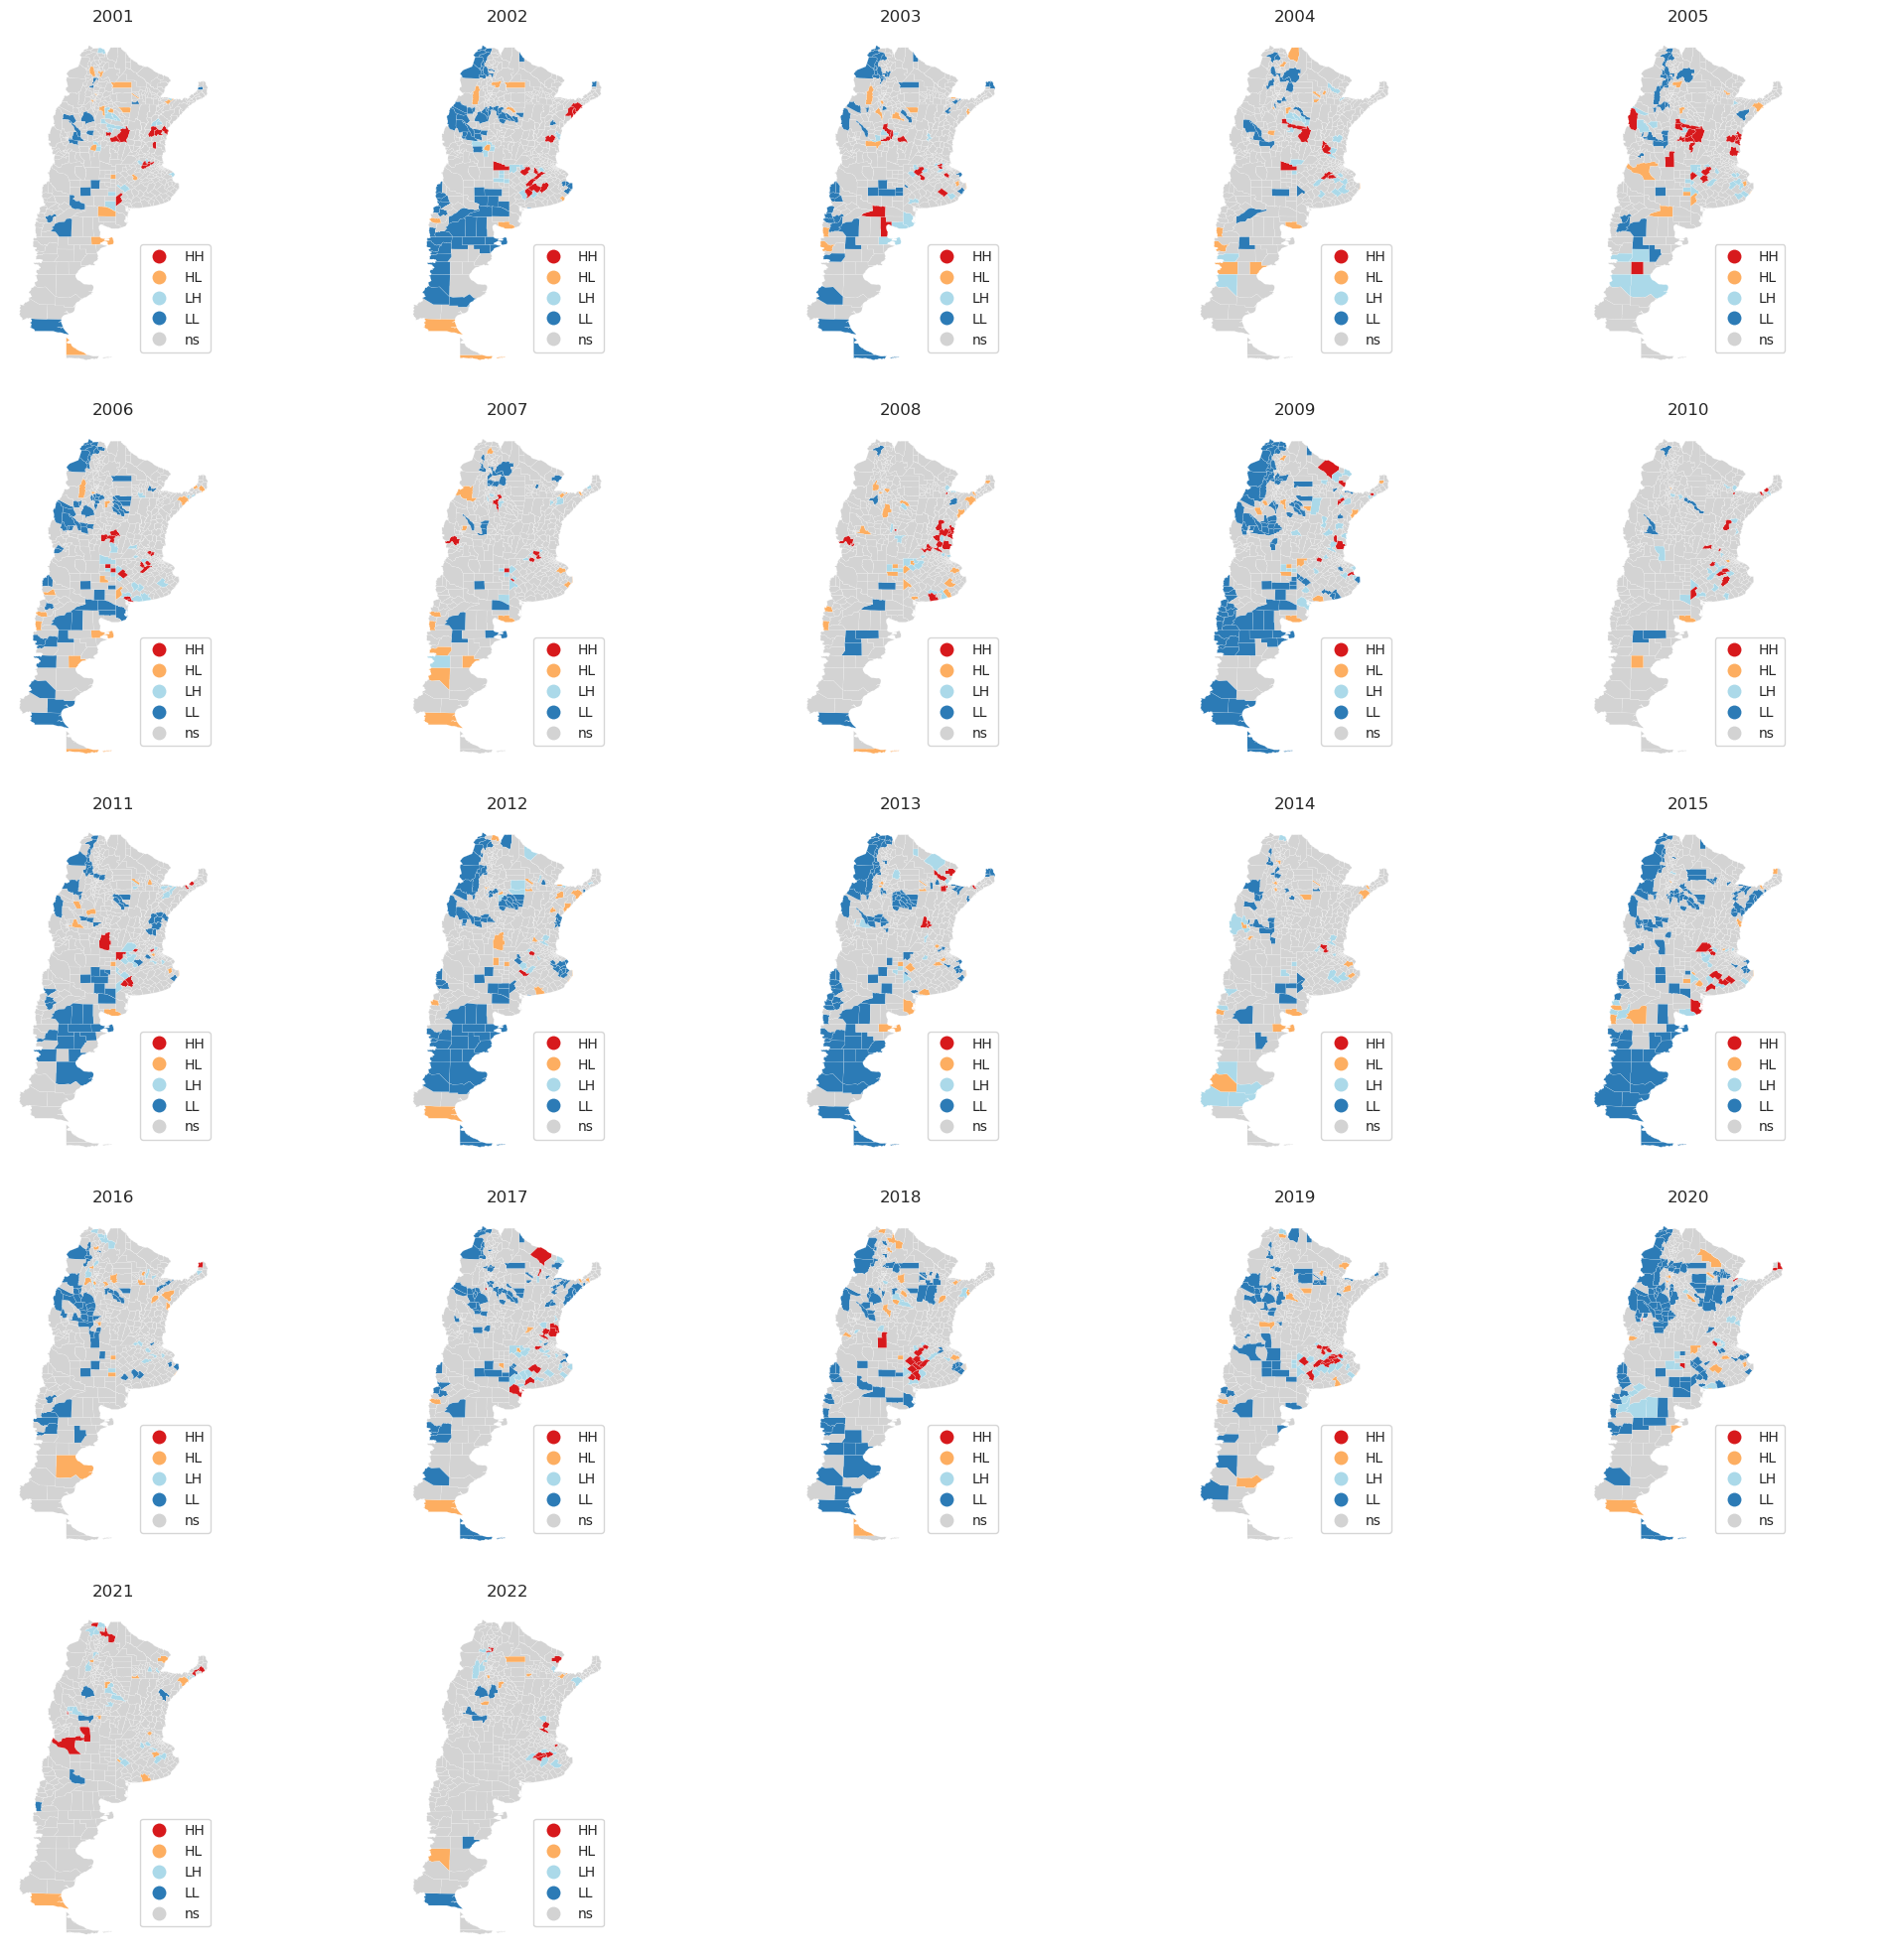

In [ ]:
# Set up plot grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
axes = axes.flatten()

# Define range of years
years = list(range(2001, 2023))  # 2001–2022
total_maps = len(years)

# Loop through each year and generate LISA maps
for i, year in enumerate(years):
    col = f"CA_{year}"

    # LISA computation
    lisa = esda.moran.Moran_Local(db[col], w)

    # Plot LISA cluster map
    esdaplot.lisa_cluster(
        lisa, db, p=0.05, ax=axes[i], legend=True,
        legend_kwds={
            "bbox_to_anchor": (1.0, 0.4),
            "fontsize": 10
        }
    )

    axes[i].set_title(f"{year}")
    axes[i].set_axis_off()

# Turn off unused axes (row 4, columns 2, 3, and 4 → indices 22, 23, 24)
for idx in [22, 23, 24]:
    axes[idx].set_axis_off()

# Adjust layout
plt.tight_layout()
plt.show()

**Legend Interpretation (LISA Cluster Types)**

* HH	High values surrounded by high values	🔴 Red
* LL	Low values surrounded by low values	🔵 Blue
* LH	Low values surrounded by high values (outlier)	🟠 Orange
* HL	High values surrounded by low values (outlier)	🟠 Orange
* ns	Not significant (p ≥ 0.05)	⚪ Gray


**Consistent Clusters**

🔵 LL clusters (blue) in the Patagonia and southern regions (e.g., southern Buenos Aires, Chubut, Santa Cruz) are highly consistent across time. These areas likely have persistently low asthma mortality rates. May reflect environmental conditions (low pollution, sparse population).

🔴 Emerging HH Clusters
Red HH clusters (high-high) are episodically present across:

* Northern Córdoba, Chaco, Corrientes, and Noroeste Argentino (NOA) regions.

* 2015, 2018, and 2021–2022 show stronger HH concentrations.

* These years/regions may warrant further investigation (e.g., pollution spikes, urbanization, or climate).

🟠 Spatial Outliers (HL, LH)
Outliers (orange) appear sporadically in various provinces.

* These may suggest local shocks (e.g., wildfires, industrial events) or reporting anomalies.


⚪ Large areas of non-significance
Many departments are gray (ns), especially in central Argentina and urban peripheries. This could be due to low variance, insufficient sample sizes, or lack of spatial autocorrelation.

**Interpretation Summary**

* Strong, persistent LL clusters. 	Stable regions with low mortality — possibly due to favorable environmental or health conditions.
* Emergence of HH clusters	May reflect environmental stressors (pollution, climate events) or demographic shifts.
* Outlier clusters (LH, HL)	Could represent areas with rapid change, anomalous events, or data quality issues.
* Temporal dynamics	Suggest evolving spatial processes — should be explored using time-series spatial modeling.




### Temporal Analysis

#### NAMR Over Time

In [4]:
# Load  `gdf`  from a shapefile containing asthma mortality data from 2001 to 2022
gdf = gpd.read_file("pdt/asthma_mortality/data/shp/tma_2001_2022_2.shp", encoding='utf-8')

In [5]:
# Drop geometry if only panel analysis is needed
df = gdf.drop(columns="geometry")

In [6]:
# Reshape gdf to long format
years = range(2001, 2023)
records = []

In [7]:
for _, row in df.iterrows():
    iddpto = row["IDDPTO"]
    for year in years:
        records.append({
            "IDDPTO": iddpto,
            "YEAR": year,
            "CA": row.get(f"CA_{year}", np.nan)
            })

In [8]:
# create new df from list and sort
panel_df = pd.DataFrame(records)

In [9]:
# Sort and reset index
panel_df = panel_df.sort_values(by=["IDDPTO", "YEAR"]).reset_index(drop=True)

In [ ]:
# visualize panel_df
init_notebook_mode(all_interactive=True)
show(panel_df)

In [ ]:
# get basic info of panel_df
panel_df.info()

In [12]:
# copy panel_df
df_ts = panel_df.copy()

In [13]:
# Convert 'YEAR' column to datetime format using '%Y'
df_ts['YEAR'] = pd.to_datetime(df_ts['YEAR'], format='%Y')

In [14]:
df_ts.set_index('YEAR', inplace=True)

In [ ]:
# visualize df_ts
init_notebook_mode(all_interactive=True)
show(df_ts)

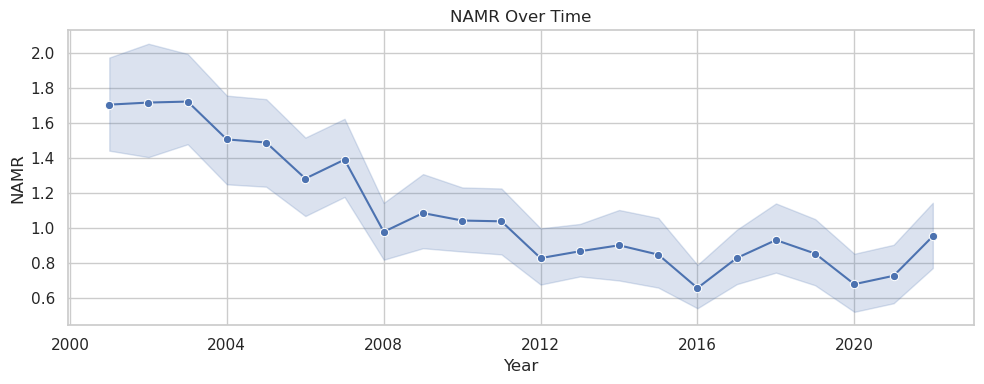

In [ ]:
# Plot mortality rate over time
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_ts, x=df_ts.index, y='CA', marker='o')
plt.title('NAMR Over Time')
plt.ylabel('NAMR')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Overall Declining Trend
The NAMR shows a clear downward trend from around 1.7 per unit in 2001 to below 1.0 by 2016, reaching a minimum around 2020. This suggests that asthma mortality risk decreased over the two decades — a positive public health outcome.

2. NAMR exhibited greater variability in the earlier years of the study period, which may be attributed to environmental fluctuations and/or progressive improvements in the asthma healthcare system over time.

3. Short-Term Fluctuations There are several year-to-year variations in the NAMR: i) Spikes in 2003 and 2007–2008l; ii) Troughs around 2012, 2016, and 2020. These may be due to environmental, demographic, or healthcare access factors (e.g., pollution events, epidemics, healthcare reforms, or data irregularities).

4. Recent Uptick (Post-2020). After reaching a minimum around 2020, there’s a small upward rebound in NAMR in 2021–2022. This might suggest: i)  resurgence in asthma mortality: ii) Potential impact of COVID-19 on respiratory health or healthcare accessibility, or changes in environmental conditions like increased PM2.5 or wildfire events.

5. A lagged analysis between predictors (e.g., PM2.5, land use change, climate) and this outcome may reveal key drivers.

#### ACF and PACF plots

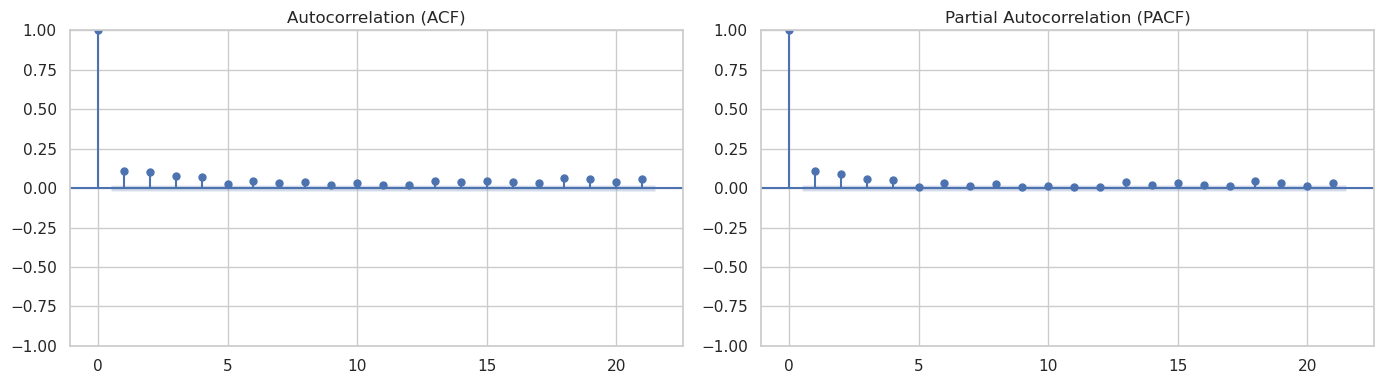

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(df_ts['CA'], ax=axes[0], lags=21, title='Autocorrelation (ACF)')
plot_pacf(df_ts['CA'], ax=axes[1], lags=21, title='Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()

**ACF Plot (Left Plot)**
* Lag 1: Shows a moderate positive autocorrelation (~0.13).

* Subsequent lags (2–20): Autocorrelation drops off quickly and remains close to zero.

The time series does not exhibit strong autocorrelation beyond the first lag it suggests a weak temporal dependency — current values are only mildly influenced by the immediately previous year.

**PACF Plot (Right Panel)**

* Lag 1: Shows a moderate positive partial autocorrelation (~0.13).

* Lags >1: Partial autocorrelations fall off quickly, hovering around zero.

The PACF cuts off after lag 1, which implies that only the most recent past value (lag 1) contributes significant explanatory power.

#### ADF Test to check stationarity

In [24]:
# create a pandas series from CA (NAMR) column
series = df_ts['CA']

In [25]:
# Apply ADF Test to check stationarity of NARMR values over time
result = adfuller(series.dropna())
print("Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value:.4f}")

# Interpretation
if result[1] <= 0.05:
    print("The time series is likely stationary (reject H0).")
else:
    print("The time series is likely non-stationary (fail to reject H0).")

Augmented Dickey-Fuller Test:
ADF Statistic: -14.1752
p-value: 0.0000
Critical Values:
   1%: -3.4309
   5%: -2.8618
   10%: -2.5669
The time series is likely stationary (reject H0).


Since the p-value ≤ 0.05, we reject the null hypothesis (H₀) and conclude that the series is likely stationary. This implies that its statistical properties—such as mean, variance, and autocorrelation—remain constant over time. Stationary series are generally more predictable, as their behavior tends to be consistent across time period.

#### Compute 3-year moving average

In [ ]:
# Compute 3-year moving average
df_ts['MA4'] = df_ts['CA'].rolling(window=4, center=True).mean()

In [ ]:
# Drop  rows with NaNs due to moving average
df_ts = df_ts.dropna()

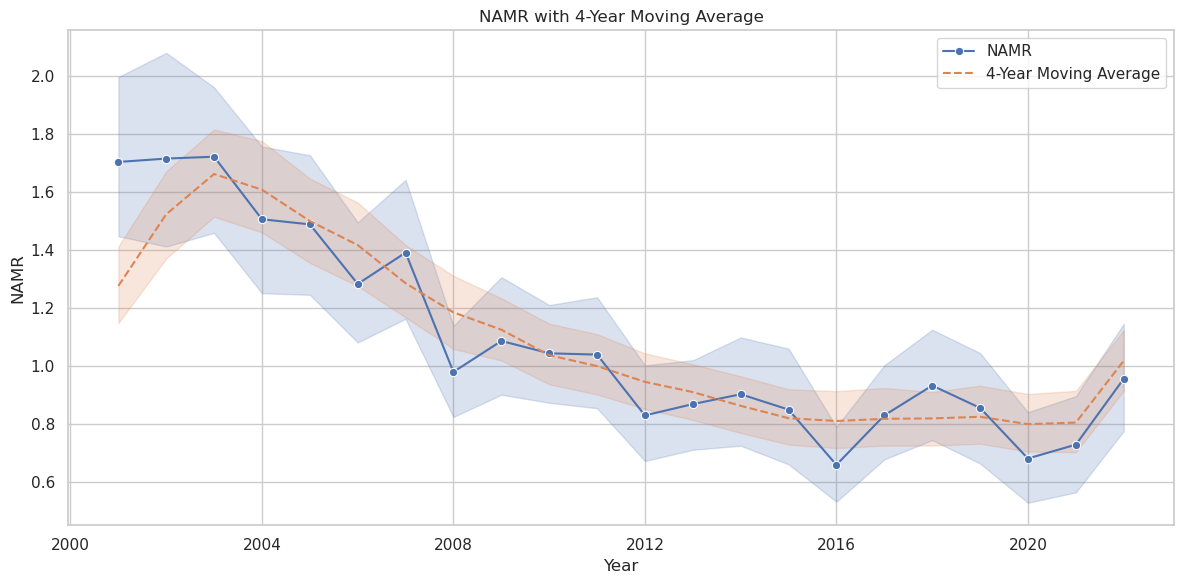

In [ ]:
# Plot with trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ts, x='YEAR', y='CA', label='NAMR', marker='o')
sns.lineplot(data=df_ts, x='YEAR', y='MA4', label='4-Year Moving Average', linestyle='--')
plt.title('NAMR with 4-Year Moving Average')
plt.xlabel('Year')
plt.ylabel('NAMR')
plt.legend()
plt.tight_layout()
plt.show()

The 4-year moving average closely follows the observed values but smooths out sudden year-to-year jumps.It confirms the long-term downward trajectory, even if some years temporarily deviate.

#### Identify temporal outliers

In [ ]:
# Define IQR bounds to identify outliers
Q1 = df_ts['CA'].quantile(0.25)
Q3 = df_ts['CA'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Flag outliers
df_ts['Outlier'] = (df_ts['CA'] < lower_bound) | (df_ts['CA'] > upper_bound)

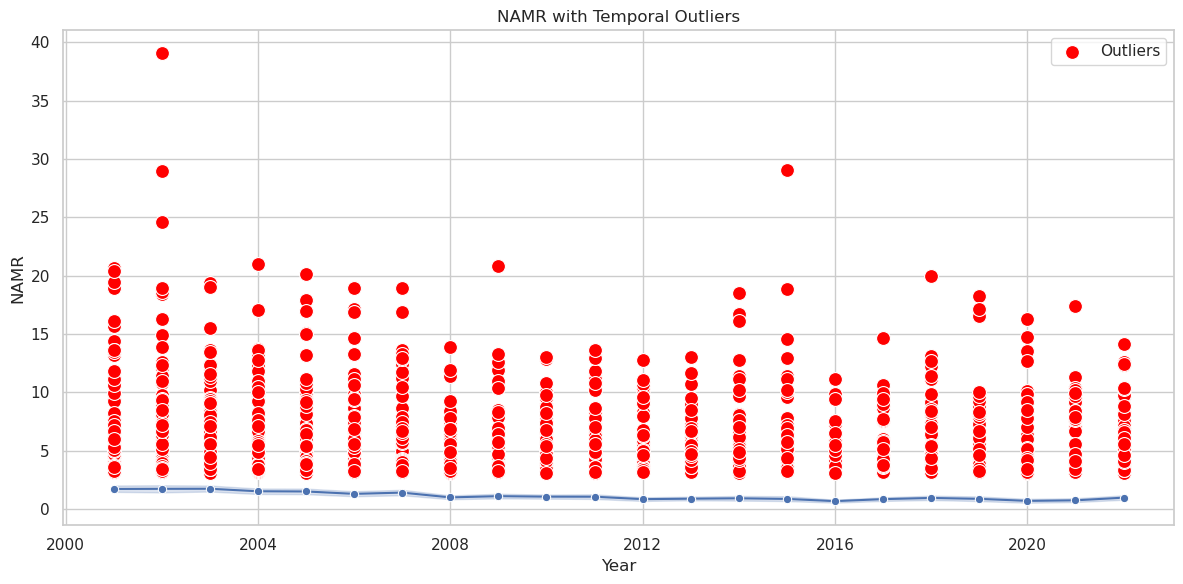

In [ ]:
# Plot with outliers highlighted
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ts, x='YEAR', y='CA', marker='o')
sns.scatterplot(data=df_ts[df_ts['Outlier']], x='YEAR', y='CA', color='red', s=100, label='Outliers')
plt.title('NAMR with Temporal Outliers')
plt.xlabel('Year')
plt.ylabel('NAMR')
plt.legend()
plt.tight_layout()
plt.show()

* Outliers are persistently present across the entire period.
* Some years (e.g., ~2002–2003, 2015, 2019) show extreme spikes, with values well above 30, while most data seems to hover below 15.
* The presence of many outliers in early 2000s may suggest either higher local mortality rates or reporting issues.
* The blue trend line is relatively flat or slightly declining, indicating that the overall NAMR has remained stable or decreased over time, despite the presence of high outliers.
* The data shows high variance and positive skew.
* These outliers may distort model estimation if not handled (e.g., using robust regression, winsorization, or model-based outlier detection).


#### Number of NAMR Zero Values per Year

In [39]:
# Group and count zero values per year
zero_counts = panel_df[panel_df['CA'] == 0].groupby('YEAR').size()

In [ ]:
all_years = pd.Series(index=range(panel_df['YEAR'].min(), panel_df['YEAR'].max() + 1))
zero_counts = all_years.combine_first(zero_counts).fillna(0)

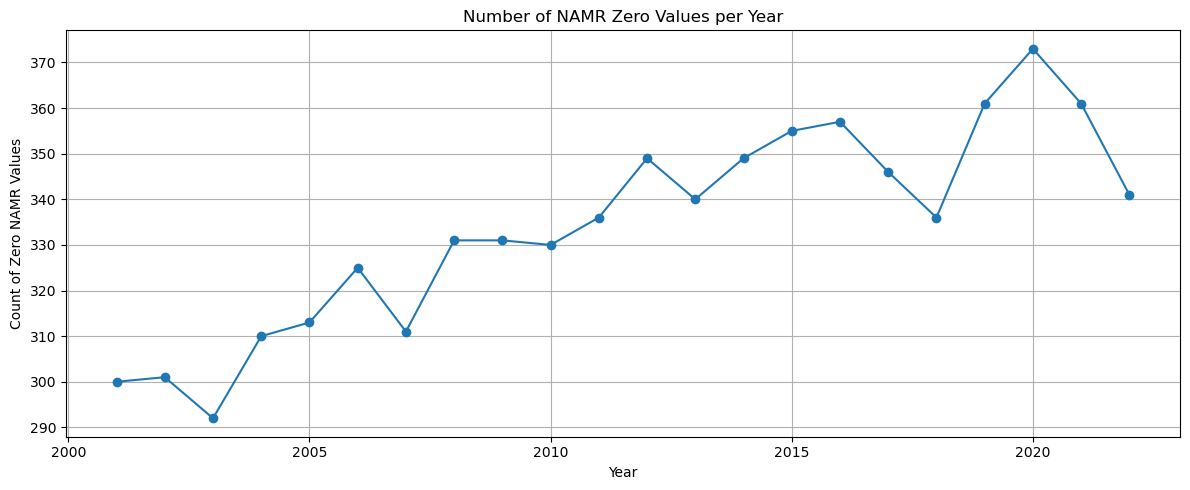

In [43]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(zero_counts.index, zero_counts.values, marker='o', linestyle='-')
plt.title("Number of NAMR Zero Values per Year")
plt.xlabel("Year")
plt.ylabel("Count of Zero NAMR Values")
plt.grid(True)
plt.tight_layout()
plt.show()

* From 2001 to 2020, the number of zero NAMR values per year generally increased, rising from ~300 to a peak of 373 in 2020.
* This may suggest that more departments reported zero asthma mortality rates over time.
* The spike in 2020 could reflect: i) COVID-19 pandemic effects, such as underreporting, healthcare system overload, or misclassification of respiratory deaths; or ii) Reduced exposure to asthma triggers (e.g., reduced pollution or indoor confinement).
* The decline after 2020 might indicate a return to pre-pandemic reporting or mortality patterns.
* Temporal autocorrelation: The smooth increase suggests some systematic drift, possibly non-random. We should consider a deeper analysis with population-based features for modeling.Also, in modeling we should forecast zero values.
*

## References


1. Andresen EM, Diehr PH, Luke DA. Public Health Surveillance of Low-Frequency Populations. Annual Review of Public Health. 2004;25(Volume 25, 2004):25-52. doi:10.1146/annurev.publhealth.25.101802.123111

2. Kostaki A, and Zafeiris KN. Dealing with limitations of empirical mortality data in small populations. Communications in Statistics: Case Studies, Data Analysis and Applications. 2019;5(1):39-45. doi:10.1080/23737484.2019.1578706

3. Berrill WT. Is the death rate from asthma exaggerated? Evidence from west Cumbria. BMJ. 1993;306(6871):193-194. doi:10.1136/bmj.306.6871.193

4. Washington State Department of Health. Guidelines for using confidence intervals for public health assessment. Published online 2012. https://doh.wa.gov/sites/default/files/legacy/Documents/1500/ConfIntGuide.pdf

5. OpenAI. ChatGPT [large language model]. OpenAI; 2025. Accessed June 12, 2025. https://chat.openai.com



